<h1><center>Airbnb Price Prediction</center></h1>

***
***

# Introduction

Airbnb was started in 2008 by Brian Chesky and Joe Gebbia, and since then, it has gained popularity due to its low prices and direct interactions with the local community. Airbnb is an online home-sharing platform where people can list or rent properties for short-term use. Be it a spare bedroom, an apartment, a villa, a private island, or even a sofa, anyone looking to earn some profit can promote their space on Airbnb.

Airbnb provides its guests with many options and varieties such as the types of apartments, types of rentals, etc. but not a lot of functionality is provided to the hosts/homeowners to determine the optimum price for their listings. Airbnb listing price is a significant factor that hosts must get right. Especially in big cities like Amsterdam, where there is a lot of competition, even the slightest variations in the prices can get the listing priced out of the market. While listing out a property, Airbnb suggests a base price by considering property details, locations, and similar properties in the area. Some third-party services and websites provide general guidance, but none of them are free. Since the holiday letting market is constantly changing, hosts should be diligent in monitoring and adjusting their prices instead of only focusing on the base price initially set by Airbnb.

In this project, we think from the homeowner's perspective and try to determine the various factors that impact the listing prices most. By doing this, we help the hosts determine the optimum nightly price for their listings and maximize their earnings from the listings. We decided to work on the Airbnb data of one of the biggest cities, Amsterdam. Unlike other cities, Airbnb has not been in a favorable position in Amsterdam due to newly established renting regulations and close competition with apartments and other rental services. We will analyze multiple data sets collected from insideAirbnb, including parameters like availability, neighbors, room types, fees, and more. In addition, we will explore the guest reviews and impact of the reviews on Airbnb rentals to help hosts make better decisions.



## Questions of Interest


● How does the accessibility to various amenities affect the price of Airbnb listings?

> Amenities offered by the host play a significant role in the occupancy rate of a listing. Guests nowadays prefer to have basic amenities like Wifi, toiletries, heating, air conditioners, etc., to be included in the listing. We will analyze how the acceptable pricing varies depending on the number of amenities offered so that the host can determine the type of features or amenities he can add to his listing that will allow him to charge more.

● What are the various factors which affect the reviews? What insights can we gain from them?


> Having reviews on a particular listing gives it more probability to be accepted at a higher price and increases the occupancy rate. We will analyze which factors end up affecting reviews the most and how the host can effectively use them to improve the overall rating of their listing.

● Which areas have the most Airbnb properties, and which are the most expensive?

> Locating the most popular rental spots is undoubtedly one of the essential factors for attracting more guests. Usually, there are popular tourist spots or locations near the center of cities where people will pay a higher price to stay. Not only can the host increase profits by charging a higher fee at these locations, but he can also tune the pricing based on the competition in these areas and create a separate customer base of his own.

● How can we help Airbnb hosts to determine the optimum nightly price for their listings?

> Setting an optimum nightly rate according to market demand heavily influences the overall occupancy rate of a listing. The pricing strategy can vary depending on the type and characteristics of that particular listing. So we will use machine learning to help the host determine the most influential features of his listing and how he can optimize the pricing by utilizing them.

● What are the various factors which affect the Airbnb listing?

> This project focuses on helping an Airbnb host determine all the ways in which they can make the most profit out of either their existing listing or the factors that a potential host must consider before they publish a listing on Airbnb. This information can be extremely valuable to a host as it would help them understand which factors they should be focusing on more for their existing or potential listings.

## Data Acquisition

The datasets used for this project were collected from the website [Inside Airbnb](http://insideairbnb.com/), which is an independent, non-commercial, open source data tool. This investigatory website scrapes and reports publicly available information about a city's airbnb listings. The dataset used in this project was scraped on September 7th, 2021 and it contains information on all Amsterdam listings which were live on the website on that day. 

We have used the following datasets from the website:

- `listings` : This dataset contains a record for every listing published on the website for the city of Amsterdam. It contains important information such as listing neighbourhoods, property type, room time, amenities, price etc along with all the host information. This dataset has a total of 16117 rows and 74 columns. We mostly focus on this particular dataset since it has very detailed information of a particular listing that can be analyzed to make inferences. 

- `reviews` : This dataset contains information regarding guests and the reviews they have published on the website for the listings they have rented out. It has a total of 16117 rows and 6 columns. We also have review rating information of listings in the 'listing' dataset, for example average rating ,rating based on cleanliness, rating based on communication etc. We will use both of these dataset to analyze the impact of ratings. 

- `calendar` : This dataset contains information regarding the price and availibility of the listings published on the website. It has a total of 1048576 rows and 7 columns.


Even though the compiled data provides useful basis for examining and monitoring Airbnb practices, it has some critical limitations. The major one is that it only includes the advertised price. The sticker price is the overall nightly price that is advertised to potential guests, rather than the actual average amount paid per night by previous guests. The advertised prices can be set to any arbitrary amount by the host, and hosts that are less experienced with Airbnb will often set these to very low or very high.



---



---




# Choice for Heavier Grading on Data Processing or Data Analysis 



***
***

# Data Processing


- Since we will not be doing sentiment analysis, we cleaned all the free text columns and other columns unrelated to the project, for example, listing_url, scrape_id, last_scraped, name, description, neighborhood_overview, picture_url, host_url, calendar_updated, calendar_last_scraped, etc. 
- We dropped the columns which had no data by listing the count of null values in each column.
- After further analysis, we noticed that some of the columns have only one value. We created histograms of the remaining columns to identify them and removed these columns as they do not add additional insights to our analysis.
- We transformed the data in the remaining columns depending on the characteristics of the data and dropped columns that were later found to have insufficient data.

### Importing libraries and loading data 

We will import all the required libraries before starting the analysis. Then we will load the listings data to a dataframe. 

In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import plotly.graph_objects as go

In [2]:
path = 'dataset/'
listings_full_df = pd.read_csv(path + 'listings.csv')
listings_full_df

id                            listing_url       scrape_id  \
0          2818      https://www.airbnb.com/rooms/2818  20210907032724   
1         20168     https://www.airbnb.com/rooms/20168  20210907032724   
2         25428     https://www.airbnb.com/rooms/25428  20210907032724   
3         27886     https://www.airbnb.com/rooms/27886  20210907032724   
4         28871     https://www.airbnb.com/rooms/28871  20210907032724   
...         ...                                    ...             ...   
16111  52001423  https://www.airbnb.com/rooms/52001423  20210907032724   
16112  52016670  https://www.airbnb.com/rooms/52016670  20210907032724   
16113  52018685  https://www.airbnb.com/rooms/52018685  20210907032724   
16114  52050333  https://www.airbnb.com/rooms/52050333  20210907032724   
16115  52082799  https://www.airbnb.com/rooms/52082799  20210907032724   

      last_scraped                                               name  \
0       2021-09-07           Quiet Garden View Room & Super Fast WiFi   
1       2021-09-07       Studio with private bathroom in the centre 1   
2       2021-09-07  Lovely, sunny 1 bed apt in Ctr (w.lift) & firepl.   
3       2021-09-07  Romantic, stylish B&B houseboat in canal district   
4       2021-09-08                            Comfortable double room   
...            ...                                                ...   
16111   2021-09-07               Relaxed App Next to Amsterdam Canals   
16112   2021-09-08    Penthouse most beautiful apartment of Amsterdam   
16113   2021-09-07    (A) Cannabis Friendly - The LUX PENTHOUSE -420X   
16114   2021-09-08      Bed & Breakfast op mooiste plek van Waterland   
16115   2021-09-08         Canal-side studio apartment in the Jordaan   

                                             description  \
0      Quiet Garden View Room & Super Fast WiFi<br />...   
1      17th century Dutch townhouse in the heart of t...   
2      Lovely apt in Centre ( lift & fireplace) near ...   
3      Stylish and romantic houseboat on fantastic hi...   
4      <b>The space</b><br />In a monumental house ri...   
...                                                  ...   
16111  (Low price because it is just listed!).   This...   
16112  When the elevator open the doors in the middle...   
16113  LUXERY CANNABIS FRIENDLY PENTHOUSE<br /><br />...   
16114  In deze unieke accommodatie zit je precies bij...   
16115  Cosy studio apartment close in the Jordaan, th...   

                                   neighborhood_overview  \
0      Indische Buurt ("Indies Neighborhood") is a ne...   
1      Located just in between famous central canals....   
2                                                    NaN   
3             Central, quiet, safe, clean and beautiful.   
4           Flower market , Leidseplein , Rembrantsplein   
...                                                  ...   
16111  This neighborhood is amazing!  It is hip and 3...   
16112  Best location ever. City on walking distance b...   
16113                                                NaN   
16114                                                NaN   
16115                                                NaN   

                                             picture_url    host_id  \
0      https://a0.muscache.com/pictures/10272854/8dcc...       3159   
1      https://a0.muscache.com/pictures/69979628/fd6a...      59484   
2      https://a0.muscache.com/pictures/138431/7079a9...      56142   
3      https://a0.muscache.com/pictures/02c2da9d-660e...      97647   
4      https://a0.muscache.com/pictures/160889/362340...     124245   
...                                                  ...        ...   
16111  https://a0.muscache.com/pictures/miso/Hosting-...  380653922   
16112  https://a0.muscache.com/pictures/02141f9f-a486...  391646360   
16113  https://a0.muscache.com/pictures/3f474f76-e7ee...  178187873   
16114  https://a0.muscache.com/pictures/miso/Hosting-...  405106044   
16115  https://a0.muscac

The dataset has 16116 listings and 74 columns for each listing.

### Dropping irrelevant columns

Free text columns and other columns which are not useful in predicting price are being dropped, and the remaining columns are stored in a new dataframe listings_clean_df, keeping the original data intact in listings_full_df. We will also load the reviews data to a dataframe reviews_full_df, and calendar data in calendar_full_df.

In [4]:
listings_col_to_drop = ['listing_url','scrape_id','last_scraped','name','description','neighborhood_overview','picture_url','host_url','host_name','host_location','host_about','host_acceptance_rate','host_thumbnail_url'
,'host_picture_url','host_verifications','calendar_updated','calendar_last_scraped','number_of_reviews_ltm','number_of_reviews_l30d','first_review','last_review','license','reviews_per_month','host_listings_count','host_has_profile_pic']

listings_clean_df = listings_full_df.drop(listings_col_to_drop, axis=1)
listings_clean_df

id    host_id  host_since host_response_time host_response_rate  \
0          2818       3159  2008-09-24     within an hour               100%   
1         20168      59484  2009-12-02     within an hour               100%   
2         25428      56142  2009-11-20                NaN                NaN   
3         27886      97647  2010-03-23     within an hour                86%   
4         28871     124245  2010-05-13     within an hour               100%   
...         ...        ...         ...                ...                ...   
16111  52001423  380653922  2020-12-18     within an hour               100%   
16112  52016670  391646360  2021-03-08     within an hour               100%   
16113  52018685  178187873  2018-03-13     within an hour                98%   
16114  52050333  405106044  2021-06-03                NaN                NaN   
16115  52082799   68023842  2016-04-20     within an hour               100%   

      host_is_superhost   host_neighbourhood  host_total_listings_count  \
0                     t       Indische Buurt                        1.0   
1                     f       Grachtengordel                        2.0   
2                     t       Grachtengordel                        2.0   
3                     t  Westelijke Eilanden                        1.0   
4                     t    Amsterdam Centrum                        2.0   
...                 ...                  ...                        ...   
16111                 f                  NaN                        0.0   
16112                 f                  NaN                        0.0   
16113                 f       Grachtengordel                       18.0   
16114                 f                  NaN                        0.0   
16115                 f                  NaN                        0.0   

      host_identity_verified                          neighbourhood  ...  \
0                          t  Amsterdam, North Holland, Netherlands  ...   
1                          t  Amsterdam, North Holland, Netherlands  ...   
2                          f                                    NaN  ...   
3                          t  Amsterdam, North Holland, Netherlands  ...   
4                          t  Amsterdam, North Holland, Netherlands  ...   
...                      ...                                    ...  ...   
16111                      t  Amsterdam, Noord-Holland, Netherlands  ...   
16112                      t  Amsterdam, Noord-Holland, Netherlands  ...   
16113                      t                                    NaN  ...   
16114                      t                                    NaN  ...   
16115                      t                                    NaN  ...   

      review_scores_cleanliness  review_scores_checkin  \
0                          5.00                   4.97   
1                          4.79                   4.63   
2                          5.00                   5.00   
3                          4.96                   4.95   
4                          4.89                   4.97   
...                         ...                    ...   
16111                      5.00                   5.00   
16112                       NaN                    NaN   
16113                       NaN                    NaN   
16114                       NaN                    NaN   
16115                       NaN                    NaN   

       review_scores_communication  review_scores_location  \
0                             4.97                    4.68   
1                             4.62                    4.87   
2                             5.00                    5.00   
3                             4.92                    4.90   
4                             4.94                    4.97   
...                            ...                     ...   
16111                         5.00                    5.00   
16112                          NaN           

In [5]:
path = 'dataset/'
reviews_full_df = pd.read_csv(path + 'reviews.csv')
reviews_full_df

listing_id                  id        date  reviewer_id reviewer_name  \
0             2818                1191  2009-03-30        10952           Lam   
1             2818                1771  2009-04-24        12798         Alice   
2             2818                1989  2009-05-03        11869       Natalja   
3             2818                2797  2009-05-18        14064       Enrique   
4             2818                3151  2009-05-25        17977       Sherwin   
...            ...                 ...         ...          ...           ...   
397180    51758869  436665629200717769  2021-08-25     69375083         Tyler   
397181    51790429  444669151630245473  2021-09-05     99250332      Michelle   
397182    51937953  445370102503196595  2021-09-06     98959171        Alicia   
397183    51938910  446186310752632995  2021-09-07     80210416        Niklas   
397184    52001423  445428094112018905  2021-09-06    388702503       Jessica   

                                                 comments  
0       Daniel is really cool. The place was nice and ...  
1       Daniel is the most amazing host! His place is ...  
2       We had such a great time in Amsterdam. Daniel ...  
3       Very professional operation. Room is very clea...  
4       Daniel is highly recommended.  He provided all...  
...                                                   ...  
397180                         Great location, good value  
397181  My Mother and i made a little weekend trip to ...  
397182  El piso está bien, para dormir genial y puedes...  
397183  Everything was fine! The apartment is really n...  
397184  The apartment was really nice for a weekend st...  

[397185 rows x 6 columns]

We will drop the comments column in reviews since we will not be using NLP.

In [6]:
reviews_clean_df = reviews_full_df.drop('comments', axis=1)
reviews_clean_df

listing_id                  id        date  reviewer_id reviewer_name
0             2818                1191  2009-03-30        10952           Lam
1             2818                1771  2009-04-24        12798         Alice
2             2818                1989  2009-05-03        11869       Natalja
3             2818                2797  2009-05-18        14064       Enrique
4             2818                3151  2009-05-25        17977       Sherwin
...            ...                 ...         ...          ...           ...
397180    51758869  436665629200717769  2021-08-25     69375083         Tyler
397181    51790429  444669151630245473  2021-09-05     99250332      Michelle
397182    51937953  445370102503196595  2021-09-06     98959171        Alicia
397183    51938910  446186310752632995  2021-09-07     80210416        Niklas
397184    52001423  445428094112018905  2021-09-06    388702503       Jessica

[397185 rows x 5 columns]

In [7]:
path = 'dataset/'
calendar_full_df = pd.read_csv(path + 'calendar.csv')
calendar_full_df

listing_id        date available    price adjusted_price  \
0            489418  2021-09-07         f   $79.00         $79.00   
1              2818  2021-09-07         f   $59.00         $59.00   
2              2818  2021-09-08         f   $59.00         $59.00   
3              2818  2021-09-09         f   $59.00         $59.00   
4              2818  2021-09-10         f   $59.00         $59.00   
...             ...         ...       ...      ...            ...   
5881259    51718422  2022-09-02         f  $119.00        $119.00   
5881260    51718422  2022-09-03         f  $119.00        $119.00   
5881261    51718422  2022-09-04         f  $119.00        $119.00   
5881262    51718422  2022-09-05         f  $119.00        $119.00   
5881263    51718422  2022-09-06         f  $119.00        $119.00   

         minimum_nights  maximum_nights  
0                   2.0            14.0  
1                   3.0          1125.0  
2                   3.0          1125.0  
3                   3.0          1125.0  
4                   3.0          1125.0  
...                 ...             ...  
5881259             3.0            30.0  
5881260             3.0            30.0  
5881261             3.0            30.0  
5881262             3.0            30.0  
5881263             3.0            30.0  

[5881264 rows x 7 columns]

We will check if any columns in the three dataframes has null values and if these values will impact our analysis. If the total number of null values in a column is significant, then we will drop the column. 

In [8]:
listings_clean_df.isna().sum()

id                                                  0
host_id                                             0
host_since                                          5
host_response_time                              11080
host_response_rate                              11080
host_is_superhost                                   5
host_neighbourhood                               5713
host_total_listings_count                           5
host_identity_verified                              5
neighbourhood                                    5711
neighbourhood_cleansed                              0
neighbourhood_group_cleansed                    16116
latitude                                            0
longitude                                           0
property_type                                       0
room_type                                           0
accommodates                                        0
bathrooms                                       16116
bathrooms_text              

Dropping neighbourhood_group_cleansed and bathrooms from listings since these columns have no data. We also have to drop the host_response_time and host_response_rate since they have almost 70% null values each, so it won't be useful to us in drawing any analysis.

In [9]:
listings_clean_df = listings_clean_df.drop(['neighbourhood_group_cleansed', 'bathrooms','host_response_time','host_response_rate'], axis=1)
listings_clean_df.head(3)

id  host_id  host_since host_is_superhost host_neighbourhood  \
0   2818     3159  2008-09-24                 t     Indische Buurt   
1  20168    59484  2009-12-02                 f     Grachtengordel   
2  25428    56142  2009-11-20                 t     Grachtengordel   

   host_total_listings_count host_identity_verified  \
0                        1.0                      t   
1                        2.0                      t   
2                        2.0                      f   

                           neighbourhood  \
0  Amsterdam, North Holland, Netherlands   
1  Amsterdam, North Holland, Netherlands   
2                                    NaN   

                   neighbourhood_cleansed  latitude  ...  \
0  Oostelijk Havengebied - Indische Buurt  52.36435  ...   
1                            Centrum-Oost  52.36407  ...   
2                            Centrum-West  52.37490  ...   

   review_scores_cleanliness review_scores_checkin  \
0                       5.00                  4.97   
1                       4.79                  4.63   
2                       5.00                  5.00   

  review_scores_communication  review_scores_location review_scores_value  \
0                        4.97                    4.68                4.81   
1                        4.62                    4.87                4.49   
2                        5.00                    5.00                4.80   

   instant_bookable  calculated_host_listings_count  \
0                 t                               1   
1                 t                               2   
2                 f                               1   

  calculated_host_listings_count_entire_homes  \
0                                           0   
1                                           0   
2                                           1   

  calculated_host_listings_count_private_rooms  \
0                                            1   
1                                            2   
2                                            0   

   calculated_host_listings_count_shared_rooms  
0                                            0  
1                                            0  
2                                            0  

[3 rows x 45 columns]

We will drop the calculated_host_listings_count_entire_homes, calculated_host_listings_count_private_rooms, calculated_host_listings_count_shared_rooms columns since they are parts of the calculated_host_listings_count. Calculated_host_listings_count is the sum of all these values. 

In [10]:
listings_clean_df = listings_clean_df.drop(['calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms'], axis=1)
listings_clean_df.head(3)

id  host_id  host_since host_is_superhost host_neighbourhood  \
0   2818     3159  2008-09-24                 t     Indische Buurt   
1  20168    59484  2009-12-02                 f     Grachtengordel   
2  25428    56142  2009-11-20                 t     Grachtengordel   

   host_total_listings_count host_identity_verified  \
0                        1.0                      t   
1                        2.0                      t   
2                        2.0                      f   

                           neighbourhood  \
0  Amsterdam, North Holland, Netherlands   
1  Amsterdam, North Holland, Netherlands   
2                                    NaN   

                   neighbourhood_cleansed  latitude  ...  number_of_reviews  \
0  Oostelijk Havengebied - Indische Buurt  52.36435  ...                280   
1                            Centrum-Oost  52.36407  ...                339   
2                            Centrum-West  52.37490  ...                  5   

  review_scores_rating review_scores_accuracy  review_scores_cleanliness  \
0                 4.89                   4.93                       5.00   
1                 4.44                   4.69                       4.79   
2                 5.00                   5.00                       5.00   

  review_scores_checkin  review_scores_communication  review_scores_location  \
0                  4.97                         4.97                    4.68   
1                  4.63                         4.62                    4.87   
2                  5.00                         5.00                    5.00   

  review_scores_value instant_bookable  calculated_host_listings_count  
0                4.81                t                               1  
1                4.49                t                               2  
2                4.80                f                               1  

[3 rows x 42 columns]

There are multiple columns with data on the minimum and maximum number of nights a guest is allowed to stay - minimum_nights, maximum_nights, minimum_minimum_nights, maximum_minimum_nights, minimum_maximum_nights, maximum_maximum_nights, minimum_nights_avg_ntm and maximum_nights_avg_ntm. Among them, we will only be retaining the minimum_nights and maximum_nights columns as this data is sufficient for our analysis. 

In [11]:
listings_clean_df = listings_clean_df.drop(['minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm'], axis=1)
listings_clean_df.head(3)

id  host_id  host_since host_is_superhost host_neighbourhood  \
0   2818     3159  2008-09-24                 t     Indische Buurt   
1  20168    59484  2009-12-02                 f     Grachtengordel   
2  25428    56142  2009-11-20                 t     Grachtengordel   

   host_total_listings_count host_identity_verified  \
0                        1.0                      t   
1                        2.0                      t   
2                        2.0                      f   

                           neighbourhood  \
0  Amsterdam, North Holland, Netherlands   
1  Amsterdam, North Holland, Netherlands   
2                                    NaN   

                   neighbourhood_cleansed  latitude  ...  number_of_reviews  \
0  Oostelijk Havengebied - Indische Buurt  52.36435  ...                280   
1                            Centrum-Oost  52.36407  ...                339   
2                            Centrum-West  52.37490  ...                  5   

  review_scores_rating review_scores_accuracy  review_scores_cleanliness  \
0                 4.89                   4.93                       5.00   
1                 4.44                   4.69                       4.79   
2                 5.00                   5.00                       5.00   

  review_scores_checkin  review_scores_communication  review_scores_location  \
0                  4.97                         4.97                    4.68   
1                  4.63                         4.62                    4.87   
2                  5.00                         5.00                    5.00   

  review_scores_value instant_bookable  calculated_host_listings_count  
0                4.81                t                               1  
1                4.49                t                               2  
2                4.80                f                               1  

[3 rows x 36 columns]

In [12]:
def convert(value):
    value = value[1:]
    if value[-1].isdigit(): 
        #return float(value.translate(None,',')) # it returns the same digit
        return float("".join(value.split(",")))
    #return float(float(value[:-1].translate(None,',')))
    return float(float("".join(value[:-1].split(","))))
# Convert from str to float
listings_clean_df['price_float']= listings_clean_df['price'].apply(lambda value : value if type(value) != str else convert(value))
listings_clean_df['review_scores_rating_float']= listings_clean_df['review_scores_rating'].apply(lambda value : value if type(value) != str else convert(value))
listings_clean_df

id    host_id  host_since host_is_superhost   host_neighbourhood  \
0          2818       3159  2008-09-24                 t       Indische Buurt   
1         20168      59484  2009-12-02                 f       Grachtengordel   
2         25428      56142  2009-11-20                 t       Grachtengordel   
3         27886      97647  2010-03-23                 t  Westelijke Eilanden   
4         28871     124245  2010-05-13                 t    Amsterdam Centrum   
...         ...        ...         ...               ...                  ...   
16111  52001423  380653922  2020-12-18                 f                  NaN   
16112  52016670  391646360  2021-03-08                 f                  NaN   
16113  52018685  178187873  2018-03-13                 f       Grachtengordel   
16114  52050333  405106044  2021-06-03                 f                  NaN   
16115  52082799   68023842  2016-04-20                 f                  NaN   

       host_total_listings_count host_identity_verified  \
0                            1.0                      t   
1                            2.0                      t   
2                            2.0                      f   
3                            1.0                      t   
4                            2.0                      t   
...                          ...                    ...   
16111                        0.0                      t   
16112                        0.0                      t   
16113                       18.0                      t   
16114                        0.0                      t   
16115                        0.0                      t   

                               neighbourhood  \
0      Amsterdam, North Holland, Netherlands   
1      Amsterdam, North Holland, Netherlands   
2                                        NaN   
3      Amsterdam, North Holland, Netherlands   
4      Amsterdam, North Holland, Netherlands   
...                                      ...   
16111  Amsterdam, Noord-Holland, Netherlands   
16112  Amsterdam, Noord-Holland, Netherlands   
16113                                    NaN   
16114                                    NaN   
16115                                    NaN   

                       neighbourhood_cleansed   latitude  ...  \
0      Oostelijk Havengebied - Indische Buurt  52.364350  ...   
1                                Centrum-Oost  52.364070  ...   
2                                Centrum-West  52.374900  ...   
3                                Centrum-West  52.387610  ...   
4                                Centrum-West  52.367750  ...   
...                                       ...        ...  ...   
16111                  De Baarsjes - Oud-West  52.359864  ...   
16112                                Oud-Oost  52.358310  ...   
16113                            Centrum-West  52.365632  ...   
16114                              Noord-Oost  52.420204  ...   
16115                              Westerpark  52.377240  ...   

       review_scores_accuracy review_scores_cleanliness review_scores_checkin  \
0                        4.93                      5.00                  4.97   
1                        4.69                      4.79                  4.63   
2                        5.00                      5.00                  5.00   
3                        4.93                      4.96                  4.95   
4                        4.94                      4.89                  4.97   
...                       ...                       ...                   ...   
16111                    5.00                      5.00                  5.00   
16112                     NaN                       NaN                   NaN   
16113                     NaN                       NaN                   NaN   
16114                     NaN                       NaN                   NaN   
16115                     NaN                       NaN                   NaN   



Some columns have true or false values. We will convert this categorical data and assign numeric values to them. To understand the distribution of data, we are creating histograms. We will then drop the columns which contain only one value since these columns will not impact our analysis.

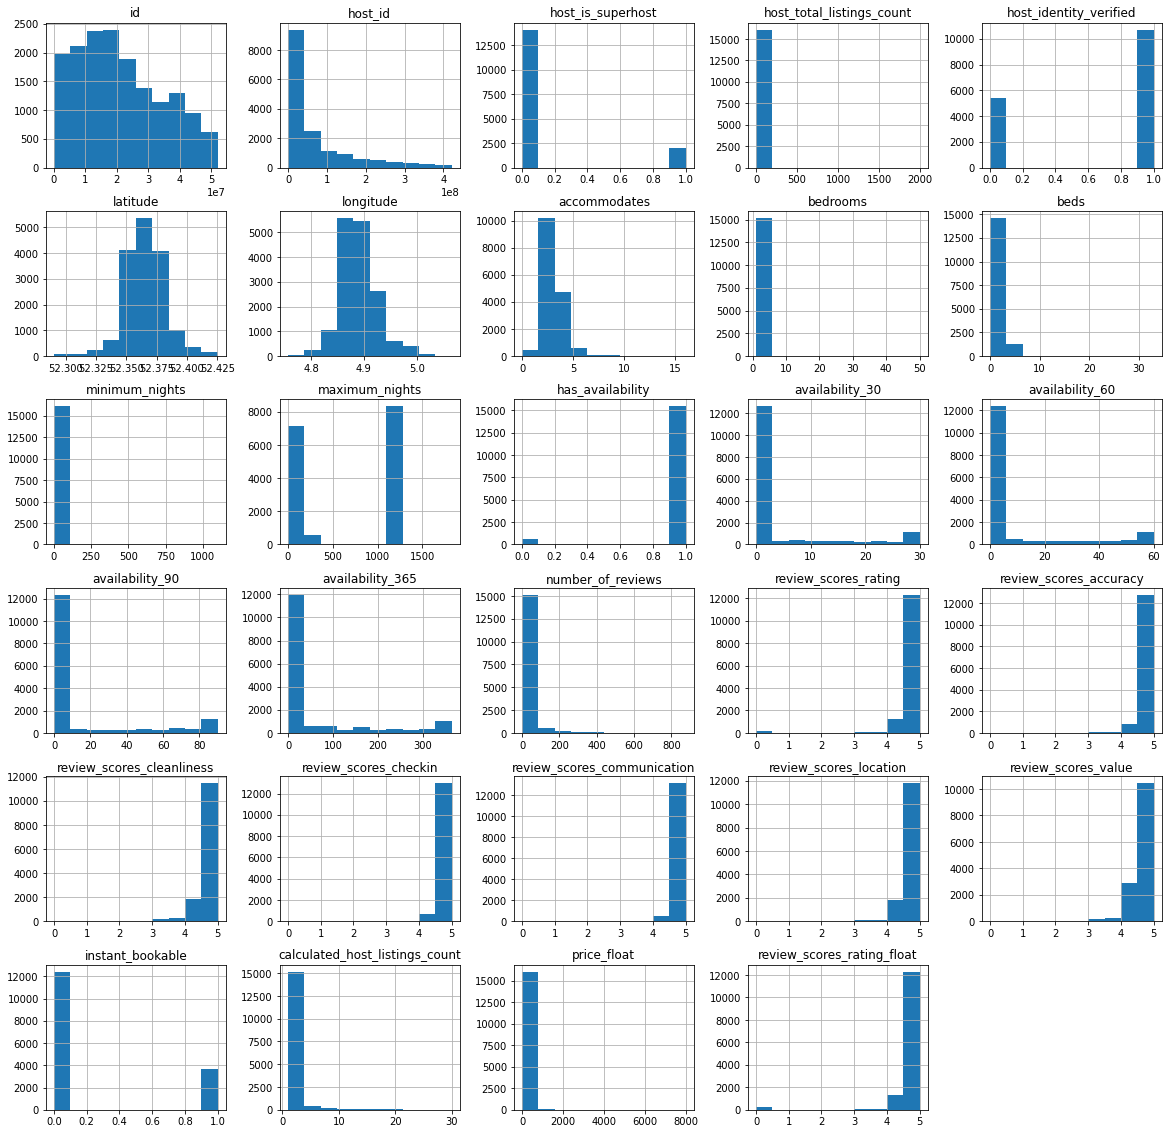

In [13]:
# Replacing columns with f/t with 0/1
listings_clean_df.replace({'f': 0, 't': 1}, inplace=True)

# Plotting the distribution of numerical and boolean categories
listings_clean_df.hist(figsize=(20,20));

In [14]:
listings_clean_df.columns

Index(['id', 'host_id', 'host_since', 'host_is_superhost',
       'host_neighbourhood', 'host_total_listings_count',
       'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed',
       'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count', 'price_float',
       'review_scores_rating_float'],
      dtype='object')

In [15]:
print(listings_clean_df['price_float'].corr(listings_clean_df['review_scores_rating_float']))
listings_clean_df.drop(columns = ['price_float','review_scores_rating_float'],inplace = True)

-0.02005030396826155


In [16]:
reviews_clean_df.isna().sum()

listing_id       0
id               0
date             0
reviewer_id      0
reviewer_name    0
dtype: int64

In [17]:
calendar_full_df.isna().sum()

listing_id          0
date                0
available           0
price             195
adjusted_price    195
minimum_nights      4
maximum_nights      4
dtype: int64

### Data Wrangling 

#### Reassigning `property types`

In the listing data, there are multiple property types assigned to the listings. Some of the same property types are considered to be different because of the format of the data, and some entries also include the room types (ex. Private room in rental unit). We will remove the room types and assign new categories to the property types. Some of the entries do not have any specific property type, so they are changed to 'unknown'.

In [18]:
listings_clean_df['property_type']

0              Private room in rental unit
1                Private room in townhouse
2                       Entire rental unit
3                Private room in houseboat
4              Private room in rental unit
                       ...                
16111                   Entire rental unit
16112                   Entire rental unit
16113                   Entire rental unit
16114    Private room in bed and breakfast
16115           Entire condominium (condo)
Name: property_type, Length: 16116, dtype: object

In [19]:
listings_clean_df['property_type']
#rename one column and extract the property part
listings_clean_df['property_type1'] = listings_clean_df['property_type'].str.split(' in ').str[-1]
#unify all type of properties
listings_clean_df['property_type1'] = listings_clean_df['property_type1'].str.lower()
#remove the part which is overlapped with other columns
listings_clean_df['property_type1'] = listings_clean_df['property_type1'].str.replace('entire','').str.replace('tiny','')
#remove the unrelated property
listings_clean_df['property_type1'] = listings_clean_df['property_type1'].str.replace('bed and breakfast','unknown')
#private room doesnot present the property ,so transfer it into unknown
listings_clean_df['property_type1'] = listings_clean_df['property_type1'].str.replace('private room','unknown').str.strip()
listings_clean_df['property_type1'].unique()

array(['rental unit', 'townhouse', 'houseboat', 'guest suite', 'boat',
       'unknown', 'residential home', 'loft', 'guesthouse',
       'boutique hotel', 'condominium (condo)', 'serviced apartment',
       'farm stay', 'chalet', 'bungalow', 'island', 'villa', 'house',
       'barn', 'cabin', 'hotel', 'cottage', 'place', 'aparthotel',
       'floor', 'dome house', 'earth house', 'home/apt', 'nature lodge',
       'casa particular', 'campsite', 'hostel', 'yurt', 'bus', 'tipi',
       'camper/rv', 'cave', 'tower'], dtype=object)

In [20]:
#recategorizing the property types
listings_clean_df.property_type1.replace({
    'rental unit':'house',
    'townhouse':'house', 
    'houseboat':'boat',
    'guest suite':'suite', 
    'boat':'boat',
    'residential home':'house', 
    'guesthouse':'hotel',
    'boutique hotel':'hotel', 
    'condominium (condo)':'apartment', 
    'serviced apartment':'apartment',
    'chalet':'tiny house', 
    'bungalow':'tiny house', 
    'barn':'farm', 
    'cottage':'cabin', 
    'place':'house',
    'aparthotel':'apartment',
    'floor':'tiny house',
    'dome house':'house', 
    'earth house':'house',
    'home/apt':'apartment',
    'nature lodge':'cabin',
    'casa particular':'particular', 
    'campsite':'camp',
    'hostel':'hotel',
    'yurt':'camp',
    'bus':'bus',
    'tipi':'camp',
    'camper/rv':'camp',
    'cave':'cave', 
    'tower':'tower'
        },inplace = True)

listings_clean_df.head()

id  host_id  host_since  host_is_superhost   host_neighbourhood  \
0   2818     3159  2008-09-24                1.0       Indische Buurt   
1  20168    59484  2009-12-02                0.0       Grachtengordel   
2  25428    56142  2009-11-20                1.0       Grachtengordel   
3  27886    97647  2010-03-23                1.0  Westelijke Eilanden   
4  28871   124245  2010-05-13                1.0    Amsterdam Centrum   

   host_total_listings_count  host_identity_verified  \
0                        1.0                     1.0   
1                        2.0                     1.0   
2                        2.0                     0.0   
3                        1.0                     1.0   
4                        2.0                     1.0   

                           neighbourhood  \
0  Amsterdam, North Holland, Netherlands   
1  Amsterdam, North Holland, Netherlands   
2                                    NaN   
3  Amsterdam, North Holland, Netherlands   
4  Amsterdam, North Holland, Netherlands   

                   neighbourhood_cleansed  latitude  ...  \
0  Oostelijk Havengebied - Indische Buurt  52.36435  ...   
1                            Centrum-Oost  52.36407  ...   
2                            Centrum-West  52.37490  ...   
3                            Centrum-West  52.38761  ...   
4                            Centrum-West  52.36775  ...   

   review_scores_rating review_scores_accuracy review_scores_cleanliness  \
0                  4.89                   4.93                      5.00   
1                  4.44                   4.69                      4.79   
2                  5.00                   5.00                      5.00   
3                  4.95                   4.93                      4.96   
4                  4.87                   4.94                      4.89   

   review_scores_checkin review_scores_communication  review_scores_location  \
0                   4.97                        4.97                    4.68   
1                   4.63                        4.62                    4.87   
2                   5.00                        5.00                    5.00   
3                   4.95                        4.92                    4.90   
4                   4.97                        4.94                    4.97   

   review_scores_value instant_bookable calculated_host_listings_count  \
0                 4.81                1                              1   
1                 4.49                1                              2   
2                 4.80                0                              1   
3                 4.80                1                              1   
4                 4.82                0                              2   

   property_type1  
0           house  
1           house  
2           house  
3            boat  
4           house  

[5 rows x 37 columns]

#### Formatting `host history`

All the data in the 'host_since' column should be dates. We will verify the pattern using regex. 

In [21]:
#matching pattern using regex and storing data with different format wrong_format
pattern = '\d{4}-\d{1,2}-\d{1,2}'
wrong_format = listings_clean_df[listings_clean_df['host_since'].str.match(pattern) == False]

#get the number of rows
wrong_format.shape[0]

0

In [22]:
listings_clean_df['host_since'].isna().sum()

5

Since there were no data in the wrong format, we can transfer the column into datetime format.
In the following snippet, we have converted the column into a measure of the number of the days that the host has been on the platform.
The data was scraped at 2021/09/07, so the active days of host will be calculated upto this date.

In [23]:
# Convert to datetime
listings_clean_df.host_since = pd.to_datetime(listings_clean_df.host_since) 

# Calculate the number of days
scrape_dt = dt.datetime(year=2021,day=7,month=9)
listings_clean_df['host_days_active'] = (scrape_dt - listings_clean_df.host_since)

listings_clean_df.head(5)

id  host_id host_since  host_is_superhost   host_neighbourhood  \
0   2818     3159 2008-09-24                1.0       Indische Buurt   
1  20168    59484 2009-12-02                0.0       Grachtengordel   
2  25428    56142 2009-11-20                1.0       Grachtengordel   
3  27886    97647 2010-03-23                1.0  Westelijke Eilanden   
4  28871   124245 2010-05-13                1.0    Amsterdam Centrum   

   host_total_listings_count  host_identity_verified  \
0                        1.0                     1.0   
1                        2.0                     1.0   
2                        2.0                     0.0   
3                        1.0                     1.0   
4                        2.0                     1.0   

                           neighbourhood  \
0  Amsterdam, North Holland, Netherlands   
1  Amsterdam, North Holland, Netherlands   
2                                    NaN   
3  Amsterdam, North Holland, Netherlands   
4  Amsterdam, North Holland, Netherlands   

                   neighbourhood_cleansed  latitude  ...  \
0  Oostelijk Havengebied - Indische Buurt  52.36435  ...   
1                            Centrum-Oost  52.36407  ...   
2                            Centrum-West  52.37490  ...   
3                            Centrum-West  52.38761  ...   
4                            Centrum-West  52.36775  ...   

   review_scores_accuracy review_scores_cleanliness review_scores_checkin  \
0                    4.93                      5.00                  4.97   
1                    4.69                      4.79                  4.63   
2                    5.00                      5.00                  5.00   
3                    4.93                      4.96                  4.95   
4                    4.94                      4.89                  4.97   

   review_scores_communication review_scores_location  review_scores_value  \
0                         4.97                   4.68                 4.81   
1                         4.62                   4.87                 4.49   
2                         5.00                   5.00                 4.80   
3                         4.92                   4.90                 4.80   
4                         4.94                   4.97                 4.82   

   instant_bookable calculated_host_listings_count property_type1  \
0                 1                              1          house   
1                 1                              2          house   
2                 0                              1          house   
3                 1                              1           boat   
4                 0                              2          house   

   host_days_active  
0         4731 days  
1         4297 days  
2         4309 days  
3         4186 days  
4         4135 days  

[5 rows x 38 columns]

#### Format the `bathroom_text` column

We found that the data in the bathroom_text column is in different formats where the number of bathrooms and type are combined together. Some of the numbers are in numeric format whereas others are descriptive. We will replace the descriptive values and then split them into separate columns with numbers and types of bathrooms.

In [24]:
listings_clean_df['bathrooms_text'].unique()

array(['1.5 shared baths', '1 private bath', '1 bath', '1.5 baths',
       '1 shared bath', nan, '2 baths', '2.5 baths', '0 baths',
       'Private half-bath', '3.5 baths', '3 baths', '4 shared baths',
       '0 shared baths', 'Half-bath', '2 shared baths', '4 baths',
       '3 shared baths', 'Shared half-bath', '6 baths', '8 baths',
       '5 baths', '2.5 shared baths', '3.5 shared baths', '5.5 baths',
       '13 baths', '4.5 baths'], dtype=object)

We will create a dictionary to format the data to "number shared/private bath/baths".

In [25]:
# half and shared are changed to 0.5 in the dictionary
translation = {'Private half-bath': '0.5 private baths', 'Half-bath': '0.5 baths', 'Shared half-bath': '0.5 shared baths'}

#bathrooms_text data are replaced from the values from translation dictionary
listings_clean_df['bathrooms_text_format'] = listings_clean_df['bathrooms_text'].replace(translation)

In [26]:
listings_clean_df['bathrooms_text_format'].unique()

array(['1.5 shared baths', '1 private bath', '1 bath', '1.5 baths',
       '1 shared bath', nan, '2 baths', '2.5 baths', '0 baths',
       '0.5 private baths', '3.5 baths', '3 baths', '4 shared baths',
       '0 shared baths', '0.5 baths', '2 shared baths', '4 baths',
       '3 shared baths', '0.5 shared baths', '6 baths', '8 baths',
       '5 baths', '2.5 shared baths', '3.5 shared baths', '5.5 baths',
       '13 baths', '4.5 baths'], dtype=object)

Splitting columns into bathrooms_number to store the number of the bathroom, and bathrooms_type to store the type of the bathroom, and replacing nan and no bathroom type data into unknown.

In [27]:
listings_clean_df['bathrooms_number'] = listings_clean_df['bathrooms_text_format'].str.split(' ').str[0]
listings_clean_df['bathrooms_type'] = listings_clean_df['bathrooms_text_format'].str.split(' ').str[1]
listings_clean_df['bathrooms_type'] = listings_clean_df['bathrooms_type'].replace(['bath','baths', np.nan], 'unknown')
listings_clean_df.head()

id  host_id host_since  host_is_superhost   host_neighbourhood  \
0   2818     3159 2008-09-24                1.0       Indische Buurt   
1  20168    59484 2009-12-02                0.0       Grachtengordel   
2  25428    56142 2009-11-20                1.0       Grachtengordel   
3  27886    97647 2010-03-23                1.0  Westelijke Eilanden   
4  28871   124245 2010-05-13                1.0    Amsterdam Centrum   

   host_total_listings_count  host_identity_verified  \
0                        1.0                     1.0   
1                        2.0                     1.0   
2                        2.0                     0.0   
3                        1.0                     1.0   
4                        2.0                     1.0   

                           neighbourhood  \
0  Amsterdam, North Holland, Netherlands   
1  Amsterdam, North Holland, Netherlands   
2                                    NaN   
3  Amsterdam, North Holland, Netherlands   
4  Amsterdam, North Holland, Netherlands   

                   neighbourhood_cleansed  latitude  ...  \
0  Oostelijk Havengebied - Indische Buurt  52.36435  ...   
1                            Centrum-Oost  52.36407  ...   
2                            Centrum-West  52.37490  ...   
3                            Centrum-West  52.38761  ...   
4                            Centrum-West  52.36775  ...   

   review_scores_communication review_scores_location review_scores_value  \
0                         4.97                   4.68                4.81   
1                         4.62                   4.87                4.49   
2                         5.00                   5.00                4.80   
3                         4.92                   4.90                4.80   
4                         4.94                   4.97                4.82   

   instant_bookable calculated_host_listings_count  property_type1  \
0                 1                              1           house   
1                 1                              2           house   
2                 0                              1           house   
3                 1                              1            boat   
4                 0                              2           house   

   host_days_active bathrooms_text_format bathrooms_number  bathrooms_type  
0         4731 days      1.5 shared baths              1.5          shared  
1         4297 days        1 private bath                1         private  
2         4309 days                1 bath                1         unknown  
3         4186 days             1.5 baths              1.5         unknown  
4         4135 days         1 shared bath                1          shared  

[5 rows x 41 columns]

#### Process `amenities` available in listings

In [28]:
df_amenities = listings_clean_df[['id','amenities','price']].copy() # create a new df to process amenities
df_amenities

id                                          amenities    price
0          2818  ["Single level home", "Coffee maker", "Long te...   $59.00
1         20168  ["Hot water", "TV", "Hangers", "Essentials", "...  $106.00
2         25428  ["Cable TV", "Coffee maker", "Long term stays ...  $125.00
3         27886  ["Coffee maker", "Long term stays allowed", "P...  $141.00
4         28871  ["Hot water", "Shampoo", "Dryer", "Hangers", "...   $75.00
...         ...                                                ...      ...
16111  52001423  ["Washer", "Fire extinguisher", "First aid kit...  $100.00
16112  52016670  ["Game console: PS4", "Coffee maker", "Boat sl...  $258.00
16113  52018685  ["TV", "Shampoo", "Hangers", "Essentials", "Fi...  $179.00
16114  52050333  ["Coffee maker", "Free parking on premises", "...   $88.00
16115  52082799  ["Washer", "Long term stays allowed", "Kitchen...  $119.00

[16116 rows x 3 columns]

In [29]:
df_amenities.loc[:,'list_amenities'] = df_amenities.amenities.apply(eval) # create a new column that contain list version amenities
df_amenities

id                                          amenities    price  \
0          2818  ["Single level home", "Coffee maker", "Long te...   $59.00   
1         20168  ["Hot water", "TV", "Hangers", "Essentials", "...  $106.00   
2         25428  ["Cable TV", "Coffee maker", "Long term stays ...  $125.00   
3         27886  ["Coffee maker", "Long term stays allowed", "P...  $141.00   
4         28871  ["Hot water", "Shampoo", "Dryer", "Hangers", "...   $75.00   
...         ...                                                ...      ...   
16111  52001423  ["Washer", "Fire extinguisher", "First aid kit...  $100.00   
16112  52016670  ["Game console: PS4", "Coffee maker", "Boat sl...  $258.00   
16113  52018685  ["TV", "Shampoo", "Hangers", "Essentials", "Fi...  $179.00   
16114  52050333  ["Coffee maker", "Free parking on premises", "...   $88.00   
16115  52082799  ["Washer", "Long term stays allowed", "Kitchen...  $119.00   

                                          list_amenities  
0      [Single level home, Coffee maker, Long term st...  
1      [Hot water, TV, Hangers, Essentials, Fire exti...  
2      [Cable TV, Coffee maker, Long term stays allow...  
3      [Coffee maker, Long term stays allowed, Patio ...  
4      [Hot water, Shampoo, Dryer, Hangers, Coffee ma...  
...                                                  ...  
16111  [Washer, Fire extinguisher, First aid kit, Car...  
16112  [Game console: PS4, Coffee maker, Boat slip, I...  
16113  [TV, Shampoo, Hangers, Essentials, Fire exting...  
16114  [Coffee maker, Free parking on premises, Boat ...  
16115  [Washer, Long term stays allowed, Kitchen, Wif...  

[16116 rows x 4 columns]

The following function returns a list of unique amenities in the series passed to it.

In [30]:
def to_1D(series):
    return pd.Series([x for _list in series for x in _list])
#sorted(to_1D(df_amenities.list_amenities).unique())

[' linens',
 ' toiletries',
 '- body soap',
 '- conditioner',
 '.  Bluetooth sound system',
 '.  stainless steel gas stove',
 '. body soap',
 '. conditioner',
 '24" TV with Chromecast',
 '28" HDTV with Netflix',
 '30" TV with standard cable',
 '32" HDTV with Apple TV, Netflix, premium cable',
 '32" HDTV with Chromecast, Netflix, premium cable, standard cable',
 '32" HDTV with Chromecast, Netflix, standard cable',
 '32" HDTV with premium cable',
 '32" TV with Chromecast',
 '32" TV with standard cable',
 '35" HDTV with Apple TV',
 '36" HDTV with Chromecast, Netflix, standard cable',
 '36" TV with Apple TV, Netflix',
 '40" HDTV with Amazon Prime Video, Apple TV, Netflix',
 '40" HDTV with Netflix',
 '40" HDTV with Netflix, premium cable, standard cable',
 '41" HDTV with Netflix, standard cable',
 '42" HDTV',
 '42" HDTV with Amazon Prime Video, Netflix, standard cable',
 '42" HDTV with Chromecast',
 '42" HDTV with Chromecast, Netflix',
 '42" HDTV with Chromecast, Netflix, standard cable',
 

In [31]:
# show the frequency of the amenities
(to_1D(df_amenities.list_amenities).value_counts()/df_amenities.shape[0])

Wifi                                                      0.972388
Essentials                                                0.961343
Heating                                                   0.946575
Kitchen                                                   0.882911
Smoke alarm                                               0.803177
                                                            ...   
natuurlijke zeep body soap                                0.000062
Self-parking — €10/day                                    0.000062
Self-parking — €35/day                                    0.000062
Onsite bar — Bar Claes                                    0.000062
Clothing storage: closet, walk-in closet, and wardrobe    0.000062
Length: 831, dtype: float64

In addition to the differences in the importance of amenities, there are also great differences in the frequency of amenities. Some amenities are almost necessary (extremely frequent), while others are very rare.

In this project, amenities are classified and extracted, and only relatively important amenities/amenity groups are taken out. At this stage, the importance of amenities does not come from any mathematical calculation but is based on common sense and daily inference. The extracted amenities will be further studied and screened in the next stage. Many too few or too many facility groups will not be used as meaningful price influencing factors because they do not provide sufficient diversity.

- Internet,wifi
- Amazon Prime Video,sound system,Apple TV,Game console,Netflix,HDTV,bluetooth
- Air conditioning
- Cooking,Kitchen,oven,Stove
- Elevator
- Dedicated workspace
- Gym,Fitness center
- Parking
- Children
- Safe,Security system,Smoke alarm,Smart lock
- breakfast

In [32]:
df_amenities.loc[df_amenities['amenities'].str.contains('Internet|wifi',flags=re.IGNORECASE), 'internet'] = True
df_amenities.loc[df_amenities['amenities'].str.contains('Amazon Prime Video|sound system|Apple TV|Game console|Netflix|HDTV|bluetooth',flags=re.IGNORECASE), 'recreation'] = True
df_amenities.loc[df_amenities['amenities'].str.contains('Air conditioning',flags=re.IGNORECASE), 'air_conditioning'] = True
df_amenities.loc[df_amenities['amenities'].str.contains('Cooking|Kitchen|oven|Stove',flags=re.IGNORECASE), 'cook'] = True
df_amenities.loc[df_amenities['amenities'].str.contains('Elevator',flags=re.IGNORECASE), 'elevator'] = True
df_amenities.loc[df_amenities['amenities'].str.contains('Dedicated workspace',flags=re.IGNORECASE), 'work'] = True
df_amenities.loc[df_amenities['amenities'].str.contains('Gym|Fitness center',flags=re.IGNORECASE), 'gym'] = True
df_amenities.loc[df_amenities['amenities'].str.contains('Parking',flags=re.IGNORECASE), 'parking'] = True
df_amenities.loc[df_amenities['amenities'].str.contains('Children',flags=re.IGNORECASE), 'children'] = True
df_amenities.loc[df_amenities['amenities'].str.contains('Safe|Security system|Smart lock',flags=re.IGNORECASE), 'secure'] = True
df_amenities.loc[df_amenities['amenities'].str.contains('breakfast',flags=re.IGNORECASE), 'breakfast'] = True

df_amenities.fillna(False,inplace = True)
df_amenities.head()


id                                          amenities    price  \
0   2818  ["Single level home", "Coffee maker", "Long te...   $59.00   
1  20168  ["Hot water", "TV", "Hangers", "Essentials", "...  $106.00   
2  25428  ["Cable TV", "Coffee maker", "Long term stays ...  $125.00   
3  27886  ["Coffee maker", "Long term stays allowed", "P...  $141.00   
4  28871  ["Hot water", "Shampoo", "Dryer", "Hangers", "...   $75.00   

                                      list_amenities  internet  recreation  \
0  [Single level home, Coffee maker, Long term st...      True       False   
1  [Hot water, TV, Hangers, Essentials, Fire exti...      True       False   
2  [Cable TV, Coffee maker, Long term stays allow...      True       False   
3  [Coffee maker, Long term stays allowed, Patio ...      True       False   
4  [Hot water, Shampoo, Dryer, Hangers, Coffee ma...      True       False   

   air_conditioning   cook  elevator   work    gym  parking  children  secure  \
0             False  False     False   True  False     True     False   False   
1             False  False     False   True  False     True     False   False   
2             False   True      True   True  False    False     False   False   
3             False  False     False   True  False    False     False    True   
4             False  False     False  False  False    False     False   False   

   breakfast  
0      False  
1      False  
2      False  
3       True  
4      False

In [33]:
df_amenities.iloc[:,4:-1].sum()/df_amenities.shape[0] # show frequency of each amenities

internet            0.978531
recreation          0.052246
air_conditioning    0.069434
cook                0.894205
elevator            0.095867
work                0.673306
gym                 0.015078
parking             0.405994
children            0.097853
secure              0.034686
dtype: float64

It can be seen that more than 97% of properties are equipped with internet amenities, so the internet cannot provide effective difference information. Therefore, we do not take the internet column as a valid column and drop it.

In [34]:
df_amenities.drop(columns = 'internet',inplace = True)

We will create a new column called score, whose value represents the number of supporting facilities selected above. For example, if one's amenities only contains Elevator and Smart lock, its score will be 2.

In [35]:
df_amenities['score'] = df_amenities.loc[:,['recreation','air_conditioning','cook','secure','elevator','work','gym','parking','children','secure','breakfast']].sum(axis = 1)
listings_clean_df['amenities_score'] = df_amenities['score']


#### Process `review ratings`

The listings without reviews will be replaced with 'no reviews'. The remaining ratings will be grouped into bins. To determine the useful bins we create histograms to display the distribution of ratings for all the review ratings columns.

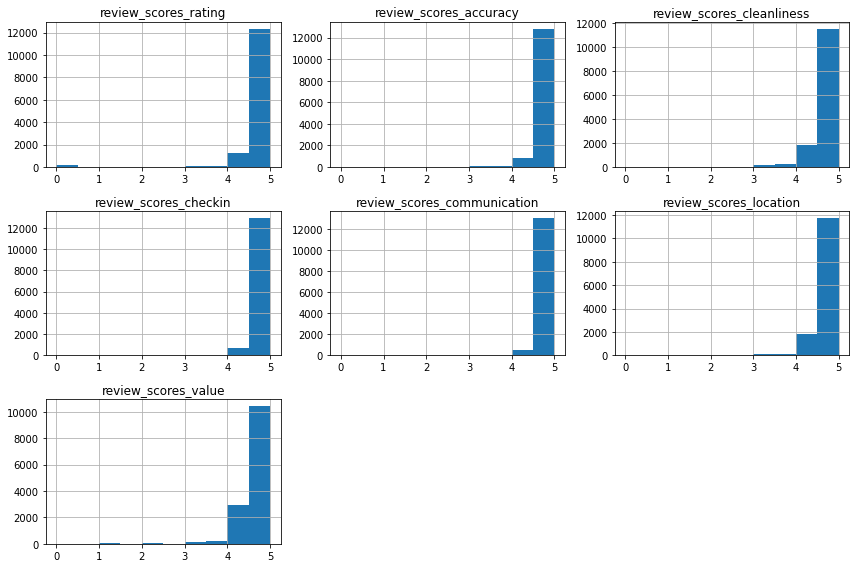

In [36]:
# Checking the distribution of the review ratings columns
review_cols_to_plot = list(listings_clean_df.columns[listings_clean_df.columns.str.startswith("review_scores") == True])
fig = plt.figure(figsize=(12,8))
for i, col_name in enumerate(review_cols_to_plot):
    ax = fig.add_subplot(3,3,i+1)
    listings_clean_df[col_name].hist(bins=10,ax=ax)
    ax.set_title(col_name)
fig.tight_layout()
plt.show()

From the above histograms we can see that most of the ratings are 4/5 or 5/5. Therefore, the ratings 4/5 and 5/5 will be separately grouped and all the remaining ratings will be grouped together into a single bin. 

In [37]:
# Binning for all the review ratings columns
bins=[0, 3, 4, 5]
labels=['0-3/5', '4/5', '5/5']
na_label='no reviews'
for col in review_cols_to_plot:
    listings_clean_df[col] = pd.cut(listings_clean_df[col], bins=bins, labels=labels, include_lowest=True)
    listings_clean_df[col] = listings_clean_df[col].astype('str')
    listings_clean_df[col].fillna(na_label, inplace=True)
    

In [38]:
listings_clean_df

id    host_id host_since  host_is_superhost   host_neighbourhood  \
0          2818       3159 2008-09-24                1.0       Indische Buurt   
1         20168      59484 2009-12-02                0.0       Grachtengordel   
2         25428      56142 2009-11-20                1.0       Grachtengordel   
3         27886      97647 2010-03-23                1.0  Westelijke Eilanden   
4         28871     124245 2010-05-13                1.0    Amsterdam Centrum   
...         ...        ...        ...                ...                  ...   
16111  52001423  380653922 2020-12-18                0.0                  NaN   
16112  52016670  391646360 2021-03-08                0.0                  NaN   
16113  52018685  178187873 2018-03-13                0.0       Grachtengordel   
16114  52050333  405106044 2021-06-03                0.0                  NaN   
16115  52082799   68023842 2016-04-20                0.0                  NaN   

       host_total_listings_count  host_identity_verified  \
0                            1.0                     1.0   
1                            2.0                     1.0   
2                            2.0                     0.0   
3                            1.0                     1.0   
4                            2.0                     1.0   
...                          ...                     ...   
16111                        0.0                     1.0   
16112                        0.0                     1.0   
16113                       18.0                     1.0   
16114                        0.0                     1.0   
16115                        0.0                     1.0   

                               neighbourhood  \
0      Amsterdam, North Holland, Netherlands   
1      Amsterdam, North Holland, Netherlands   
2                                        NaN   
3      Amsterdam, North Holland, Netherlands   
4      Amsterdam, North Holland, Netherlands   
...                                      ...   
16111  Amsterdam, Noord-Holland, Netherlands   
16112  Amsterdam, Noord-Holland, Netherlands   
16113                                    NaN   
16114                                    NaN   
16115                                    NaN   

                       neighbourhood_cleansed   latitude  ...  \
0      Oostelijk Havengebied - Indische Buurt  52.364350  ...   
1                                Centrum-Oost  52.364070  ...   
2                                Centrum-West  52.374900  ...   
3                                Centrum-West  52.387610  ...   
4                                Centrum-West  52.367750  ...   
...                                       ...        ...  ...   
16111                  De Baarsjes - Oud-West  52.359864  ...   
16112                                Oud-Oost  52.358310  ...   
16113                            Centrum-West  52.365632  ...   
16114                              Noord-Oost  52.420204  ...   
16115                              Westerpark  52.377240  ...   

       review_scores_location review_scores_value instant_bookable  \
0                         5/5                 5/5                1   
1                         5/5                 5/5                1   
2                         5/5                 5/5                0   
3                         5/5                 5/5                1   
4                         5/5                 5/5                0   
...                       ...                 ...              ...   
16111                     5/5                 5/5                0   
16112              no reviews          no reviews                0   
16113              no reviews          no reviews                1   
16114              no reviews          no reviews                1   
16115              no reviews          no reviews                0   

       calculated_host_listings_count property_type1  host_days_active  \
0                                   1         

***
***

# Data Visualization

## Q1 How does the accessibility to various amenities affect the price of Airbnb listings?

Change the data type of price from string to float. First we need to remove the '$'
Since some number contains ',', for example : 8,000, so we need to remove ','. 
Name the new column to 'price_format'.

In [40]:
#Split the price to $ and number. Get only the number and store it to price_format
listings_clean_df['price_format'] = listings_clean_df['price'].str.split('$').str[1]

#filter out ',' in the string
listings_clean_df['price_format'] = listings_clean_df['price_format'].str.replace(',', '')

#change data type to numeric
listings_clean_df['price_format'] = pd.to_numeric(listings_clean_df['price_format'])
#listings_clean_df['price_format'] = listings_clean_df['price']

To check the distribution of the price, use box plot to plot the price_format. We can find out that the overall price were around 0~1000, and there were a lot of outliers. So we use where function to filter the price. We consider that the price over 500 is high, so we change the price over 500 to 500 to generate more meaningful plots.

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa9407baa10>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa9407aa250>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa9407ba550>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa9407aab10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa9407aaf50>],
 'means': []}

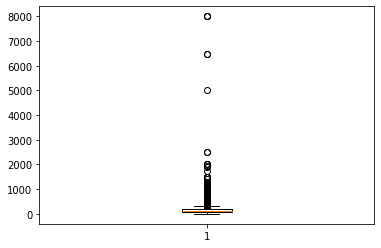

In [41]:
plt.boxplot(listings_clean_df['price_format'])

In [42]:
# replace price to 500 for the price higher than 500, otherwise, keep the same price.
listings_clean_df['price_filter'] = np.where((listings_clean_df.price_format > 500), 500, listings_clean_df.price_format)

Plot the boxplot again.

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa943ab5c50>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa943abc510>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa943ab5810>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa943abcdd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa943acb250>],
 'means': []}

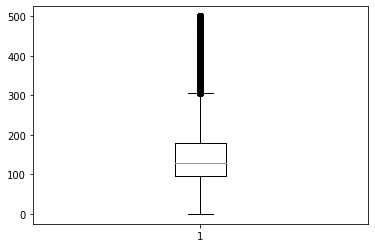

In [43]:
plt.boxplot(listings_clean_df['price_filter'])

Now we did the same thing on price for the df_amenities dataframe.

In [44]:
#Split the price to $ and number. Get only the number and store it to price_format
df_amenities['price_format'] = df_amenities['price'].str.split('$').str[1]

#filter out ',' in the string
df_amenities['price_format'] = df_amenities['price_format'].str.replace(',', '')

#change data type to numeric
df_amenities['price_format'] = pd.to_numeric(df_amenities['price_format'])
df_amenities.head()

id                                          amenities    price  \
0   2818  ["Single level home", "Coffee maker", "Long te...   $59.00   
1  20168  ["Hot water", "TV", "Hangers", "Essentials", "...  $106.00   
2  25428  ["Cable TV", "Coffee maker", "Long term stays ...  $125.00   
3  27886  ["Coffee maker", "Long term stays allowed", "P...  $141.00   
4  28871  ["Hot water", "Shampoo", "Dryer", "Hangers", "...   $75.00   

                                      list_amenities  recreation  \
0  [Single level home, Coffee maker, Long term st...       False   
1  [Hot water, TV, Hangers, Essentials, Fire exti...       False   
2  [Cable TV, Coffee maker, Long term stays allow...       False   
3  [Coffee maker, Long term stays allowed, Patio ...       False   
4  [Hot water, Shampoo, Dryer, Hangers, Coffee ma...       False   

   air_conditioning   cook  elevator   work    gym  parking  children  secure  \
0             False  False     False   True  False     True     False   False   
1             False  False     False   True  False     True     False   False   
2             False   True      True   True  False    False     False   False   
3             False  False     False   True  False    False     False    True   
4             False  False     False  False  False    False     False   False   

   breakfast  score  price_format  
0      False      2          59.0  
1      False      2         106.0  
2      False      3         125.0  
3       True      4         141.0  
4      False      0          75.0

In [45]:
# replace price to 500 for the price higher than 500, otherwise, keep the same price.
df_amenities['price_filter'] = np.where((df_amenities.price_format > 500), 500, df_amenities.price_format)

Use a for loop to generate box plot for each amenity.
The last plot is a box plot of the score (number of amenities) and price.

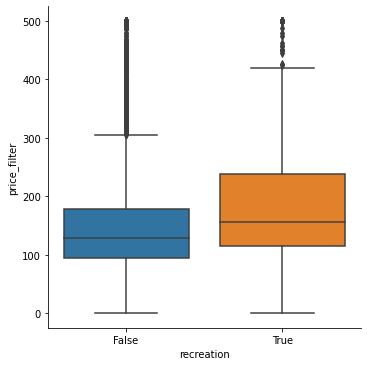

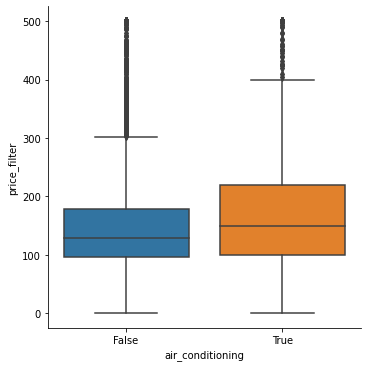

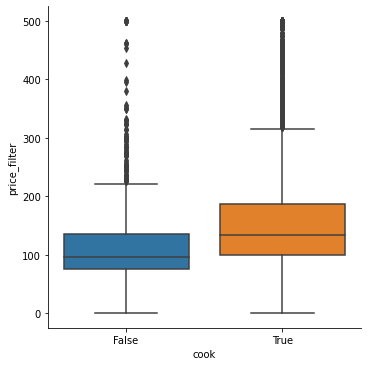

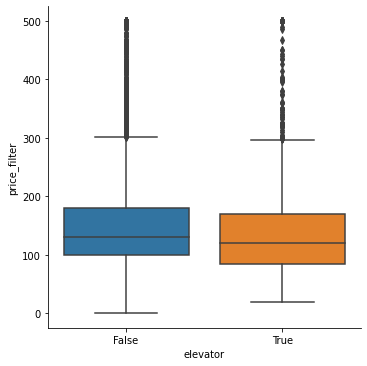

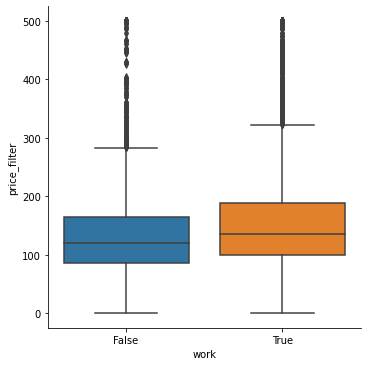

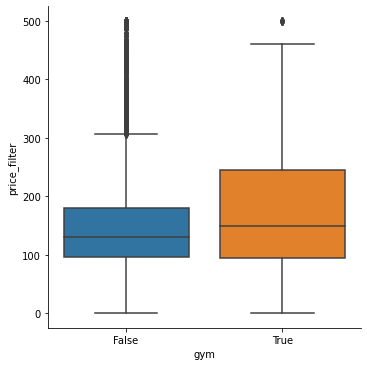

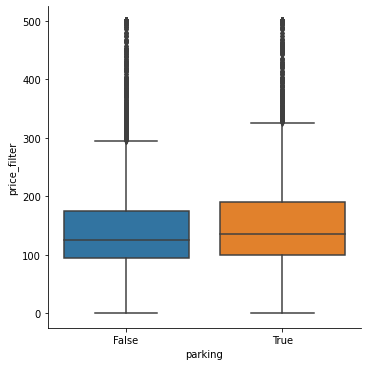

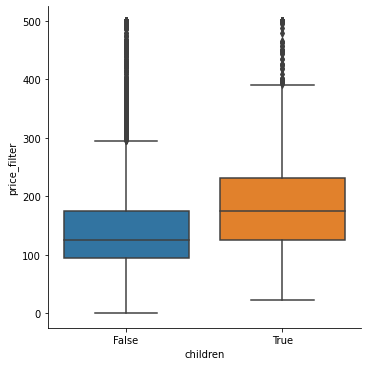

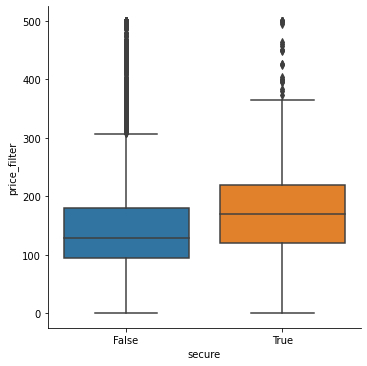

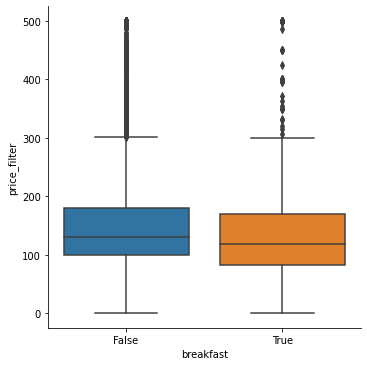

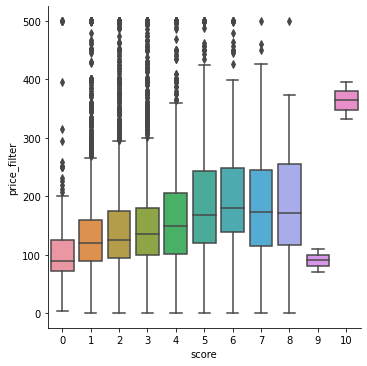

In [46]:
amenities_cols_to_plot = list(df_amenities.iloc[:,4:-2].columns)
for i, col_name in enumerate(amenities_cols_to_plot):
    sns.catplot(x=col_name, y="price_filter", kind="box", data=df_amenities)

In the above plots, we can easily find out whether having the specific amenity result in higher prices by comparing the True and False boxes. The higher the box is, the higher the prices was.

We can conclude that:
The amenities with higher prices:
recreation, air condition, cook, work, gym, parking, childern, secure

The amenities that do not have higher prices:
elevator, breakfast

So we can suggest that if the listing has recreation, air condition, cook, work, gym, parking, childer or secure, the host can place the price higher.

Also, amoung these amenities, having secure and children has a bigger difference with not having them. So if a host wants to open a new listing and he can provide these amenities, he can price it more higher.

On the other hand, we find out that the price between having breakfest and not having breakfest were similar. So we suggest the host to not provide breakfest because it is costly.

In the last box plot, we found out that while the score (number of amenities) gets higher, the box also gets higher. Which means that a host can charge a higher price if they provided lots of amenities.
But when we look at score 9, it has lower prices. So we need to take a look at the data.

In [47]:
df_amenities[df_amenities['score'] == 9]

id                                          amenities    price  \
4470   11620756  ["Cable TV", "Single level home", "Coffee make...   $71.00   
14575  41688975  ["Coffee maker", "Long term stays allowed", "I...  $110.00   

                                          list_amenities  recreation  \
4470   [Cable TV, Single level home, Coffee maker, Ka...        True   
14575  [Coffee maker, Long term stays allowed, Indoor...        True   

       air_conditioning  cook  elevator  work   gym  parking  children  \
4470              False  True      True  True  True     True     False   
14575              True  True     False  True  True     True     False   

       secure  breakfast  score  price_format  price_filter  
4470     True       True      9          71.0          71.0  
14575    True       True      9         110.0         110.0

Since there were only two data points that has nine amenities, we consider that maybe there were some other factors that were stronger than the number of ameties the affects the price.

## Q2 What are the various factors which affect the reviews?

## Q3 Which areas have the most Airbnb properties, and which are the most expensive?

In [48]:
mapbox_access_token = 'pk.eyJ1IjoiZmFiaWVubmV5YW5nIiwiYSI6ImNrdnZqejFlNDJzdmIydm1ucnRrMXhybXIifQ.yNoWRN125HKSsv-vux0lKg'

In [49]:
import plotly.express as px

Use the price filter we created to plot a map. The darker the dot is, the higher the price is.

In [50]:
px.set_mapbox_access_token(mapbox_access_token)
fig = px.scatter_mapbox(listings_clean_df, lat="latitude", lon="longitude", color="price_filter",
                  color_continuous_scale="redor", size_max=15, zoom=10, mapbox_style="stamen-terrain")
fig.show()

In the above plot, we found out that there are specific areas that has darker dots. Which means the area has higher price.
The area that has higher price were:
Amsterdam Marina
Tolhuistuin
Vondelpark
Sportpark De Eendracht

Amoung these places, there is only a few listings in Sportpark De Edndracht. So we suggest the hosts to open up new listings in the area and place it in a higher price.


In [51]:
listings_clean_df.drop(columns = ['price_format','price_filter'],inplace = True)

## Q4 How can we help Airbnb hosts to determine the optimum nightly price for their listings?

Since the prediction target price is a continuous and specific value, we should use regression model other than classification model.

### Data Pre-Processing

In [52]:
listings_clean_df.isnull().any()

id                                False
host_id                           False
host_since                         True
host_is_superhost                  True
host_neighbourhood                 True
host_total_listings_count          True
host_identity_verified             True
neighbourhood                      True
neighbourhood_cleansed            False
latitude                          False
longitude                         False
property_type                     False
room_type                         False
accommodates                      False
bathrooms_text                     True
bedrooms                           True
beds                               True
amenities                         False
price                             False
minimum_nights                    False
maximum_nights                    False
has_availability                  False
availability_30                   False
availability_60                   False
availability_90                   False


#### Transform to numerical data

In [53]:
listings_clean_df.price = listings_clean_df.price.str.replace('$','',regex = False).str.replace(',','').astype(float)
listings_clean_df.review_scores_value = listings_clean_df.review_scores_value.replace('no reviews',np.nan,regex = False).replace({'0-3/5':1, '4/5':2, '5/5':3}).astype(float)
listings_clean_df.review_scores_location = listings_clean_df.review_scores_location.replace('no reviews',np.nan,regex = False).replace({'0-3/5':1, '4/5':2, '5/5':3}).astype(float)
listings_clean_df.review_scores_communication = listings_clean_df.review_scores_communication.replace('no reviews',np.nan,regex = False).replace({'0-3/5':1, '4/5':2, '5/5':3}).astype(float)
listings_clean_df.review_scores_checkin = listings_clean_df.review_scores_checkin.replace('no reviews',np.nan,regex = False).replace({'0-3/5':1, '4/5':2, '5/5':3}).astype(float)
listings_clean_df.review_scores_cleanliness = listings_clean_df.review_scores_cleanliness.replace('no reviews',np.nan,regex = False).replace({'0-3/5':1, '4/5':2, '5/5':3}).astype(float)
listings_clean_df.review_scores_accuracy = listings_clean_df.review_scores_accuracy.replace('no reviews',np.nan,regex = False).replace({'0-3/5':1, '4/5':2, '5/5':3}).astype(float)
listings_clean_df.review_scores_rating = listings_clean_df.review_scores_rating.replace('no reviews',np.nan,regex = False).replace({'0-3/5':1, '4/5':2, '5/5':3}).astype(float)




#### Show data type attributes

In [54]:
numerical_columns = [col for col in listings_clean_df.columns if type(listings_clean_df.loc[0,col]) in [np.int64, float, np.float64]]
str_columns = [col for col in listings_clean_df.columns if type(listings_clean_df.loc[0,col]) is str]


['id',
 'host_id',
 'host_is_superhost',
 'host_total_listings_count',
 'host_identity_verified',
 'latitude',
 'longitude',
 'accommodates',
 'bedrooms',
 'beds',
 'price',
 'minimum_nights',
 'maximum_nights',
 'has_availability',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'instant_bookable',
 'calculated_host_listings_count',
 'bathrooms_number',
 'amenities_score']

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from tqdm import tqdm_notebook as tqdm

#### Correlation Analysis and Redundancies

Create a heatmap for correlation matrix, which shows higher correlation with lighter.

<Figure size 720x504 with 0 Axes>

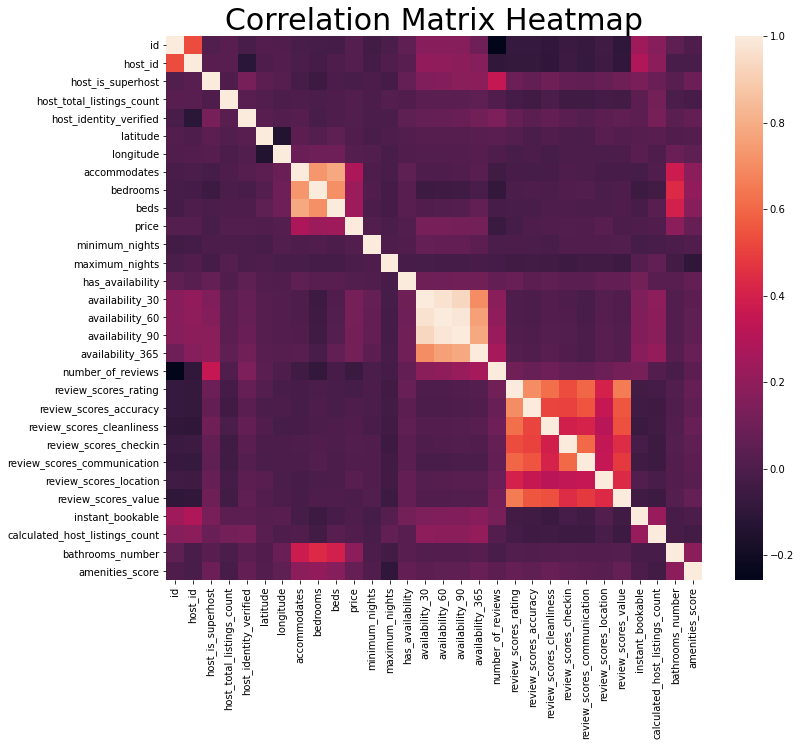

In [111]:
plt.figure(figsize = (10,7))
plt.figure(figsize=(12,10))
sns.heatmap(listings_clean_df.corr())
plt.title('Correlation Matrix Heatmap',fontsize = 30)
plt.show()

#### Drop irrelevant features

In [58]:
selected_feature_df = listings_clean_df.drop(columns = ['id','host_id'])
selected_feature_df.drop(columns = ['host_since','host_neighbourhood','neighbourhood',
                                    'bathrooms_text','host_days_active','property_type',
                                    'amenities','bathrooms_text_format'],
                                inplace = True)

#### Drop features with high correlation

There are three lighter cluster on the above picture, which means there are three clusters of features and each of them has high correlation. 

For the upper left cluster('accommodates', 'beds', 'bedrooms'), we keep 'accomodates'.

For the middle cluster('availability_30','availability_60','availability_90','availability_365'), we keep 'availability_365'.

For the bottom cluster('review_scores_accuracy', 'review_scores_cleanliness','review_scores_checkin', 'review_scores_communication', 'review_scores_value', 'review_scores_location'), we keep 'review_scores_value' and 'review_scores_location'.


In [59]:
selected_feature_df.drop(columns = ['availability_30','availability_60','availability_90','bedrooms','review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication'],inplace = True)
selected_feature_df.columns

Index(['host_is_superhost', 'host_total_listings_count',
       'host_identity_verified', 'neighbourhood_cleansed', 'latitude',
       'longitude', 'room_type', 'accommodates', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_365', 'number_of_reviews', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count', 'property_type1', 'bathrooms_number',
       'bathrooms_type', 'amenities_score'],
      dtype='object')

#### Process nan value

In [60]:
selected_feature_df.host_is_superhost.fillna(0,inplace = True)
selected_feature_df.bathrooms_number = listings_clean_df.bathrooms_number.fillna(0.0).astype(float)
selected_feature_df.host_identity_verified.fillna(0,inplace = True)
selected_feature_df.host_total_listings_count.fillna(1,inplace = True)
selected_feature_df.beds.fillna(listings_clean_df.beds.mean(),inplace = True)
selected_feature_df['review_scores_location'].fillna(selected_feature_df['review_scores_location'].mean(),inplace = True)
selected_feature_df.review_scores_value.fillna(listings_clean_df.review_scores_value.mean(),inplace = True)
selected_feature_df.columns



Index(['host_is_superhost', 'host_total_listings_count',
       'host_identity_verified', 'neighbourhood_cleansed', 'latitude',
       'longitude', 'room_type', 'accommodates', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_365', 'number_of_reviews', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count', 'property_type1', 'bathrooms_number',
       'bathrooms_type', 'amenities_score'],
      dtype='object')

#### Outliers and Skewness Detection

Filter the dataset with price because if the price is 0, it is obvious abnormal and unmeaningful.

In [61]:
selected_feature_df = selected_feature_df[selected_feature_df['price'] != 0.0]

array([[<AxesSubplot:title={'center':'host_is_superhost'}>,
        <AxesSubplot:title={'center':'host_total_listings_count'}>,
        <AxesSubplot:title={'center':'host_identity_verified'}>,
        <AxesSubplot:title={'center':'latitude'}>],
       [<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'accommodates'}>,
        <AxesSubplot:title={'center':'beds'}>,
        <AxesSubplot:title={'center':'price'}>],
       [<AxesSubplot:title={'center':'minimum_nights'}>,
        <AxesSubplot:title={'center':'maximum_nights'}>,
        <AxesSubplot:title={'center':'has_availability'}>,
        <AxesSubplot:title={'center':'availability_365'}>],
       [<AxesSubplot:title={'center':'number_of_reviews'}>,
        <AxesSubplot:title={'center':'review_scores_location'}>,
        <AxesSubplot:title={'center':'review_scores_value'}>,
        <AxesSubplot:title={'center':'instant_bookable'}>],
       [<AxesSubplot:title={'center':'calculated_host_listings_count'}>,

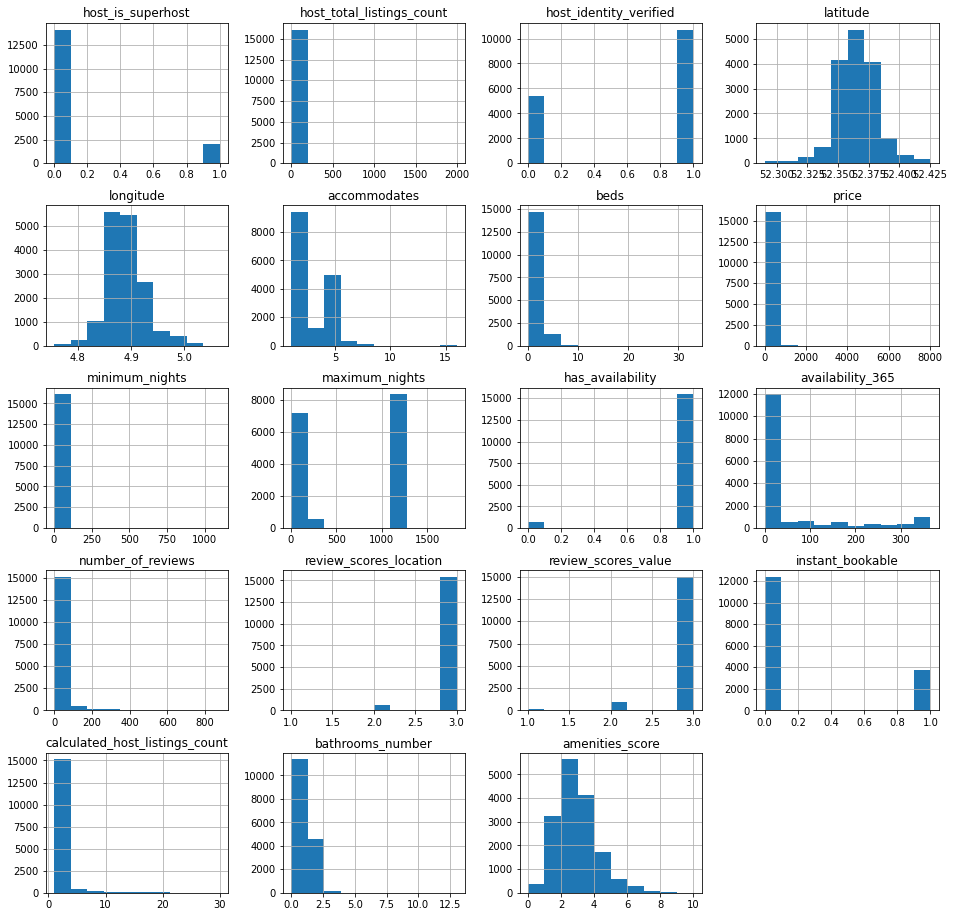

In [62]:
selected_feature_df.hist(figsize=(16,16))

#### Eliminate right skewness

Eliminate the right skewness with log transformation.

In [63]:
transformed_df = selected_feature_df.copy()
right_skew = ['host_total_listings_count','accommodates',
                'beds','price','minimum_nights',
                'availability_365',
                'number_of_reviews','calculated_host_listings_count']

for col in right_skew:
    transformed_df[col] = selected_feature_df[col].replace(0.0, 0.001) # Replacing 0s with 0.01
    transformed_df[col] = np.log(transformed_df[col])

array([[<AxesSubplot:title={'center':'host_is_superhost'}>,
        <AxesSubplot:title={'center':'host_total_listings_count'}>,
        <AxesSubplot:title={'center':'host_identity_verified'}>,
        <AxesSubplot:title={'center':'latitude'}>],
       [<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'accommodates'}>,
        <AxesSubplot:title={'center':'beds'}>,
        <AxesSubplot:title={'center':'price'}>],
       [<AxesSubplot:title={'center':'minimum_nights'}>,
        <AxesSubplot:title={'center':'maximum_nights'}>,
        <AxesSubplot:title={'center':'has_availability'}>,
        <AxesSubplot:title={'center':'availability_365'}>],
       [<AxesSubplot:title={'center':'number_of_reviews'}>,
        <AxesSubplot:title={'center':'review_scores_location'}>,
        <AxesSubplot:title={'center':'review_scores_value'}>,
        <AxesSubplot:title={'center':'instant_bookable'}>],
       [<AxesSubplot:title={'center':'calculated_host_listings_count'}>,

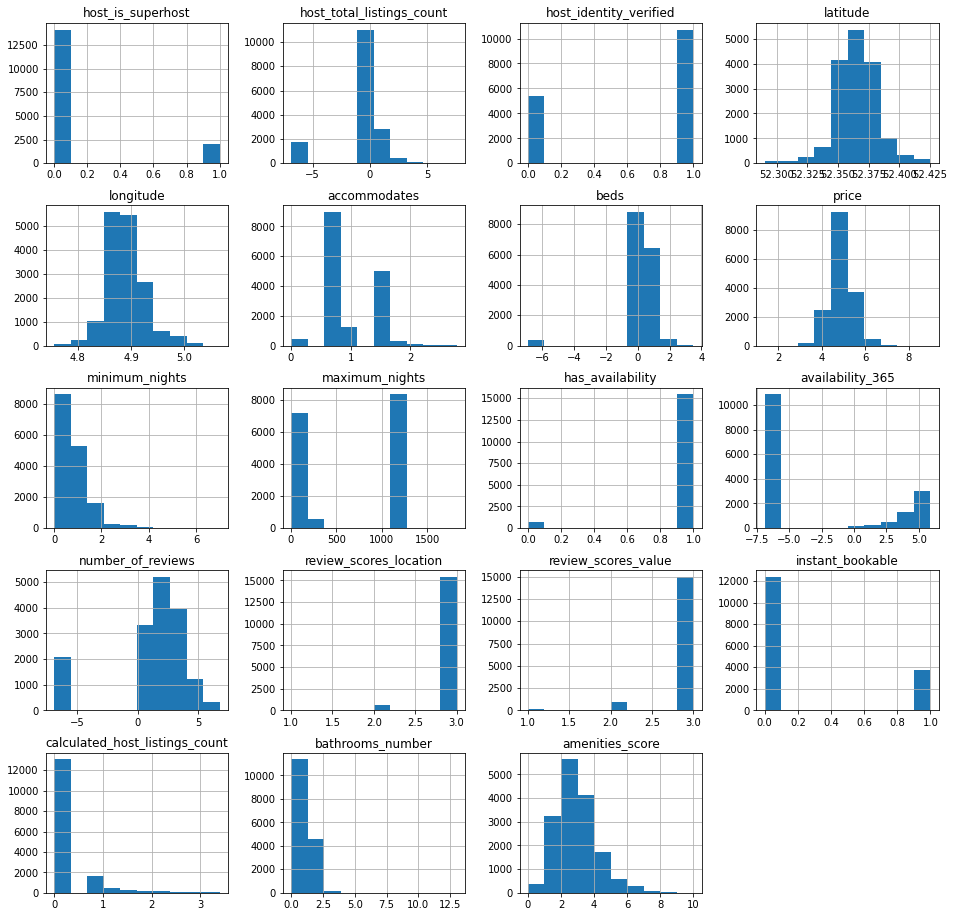

In [64]:
transformed_df.hist(figsize=(16,16))

In [65]:
transformed_df.isnull().any()

host_is_superhost                 False
host_total_listings_count         False
host_identity_verified            False
neighbourhood_cleansed            False
latitude                          False
longitude                         False
room_type                         False
accommodates                      False
beds                              False
price                             False
minimum_nights                    False
maximum_nights                    False
has_availability                  False
availability_365                  False
number_of_reviews                 False
review_scores_location            False
review_scores_value               False
instant_bookable                  False
calculated_host_listings_count    False
property_type1                    False
bathrooms_number                  False
bathrooms_type                    False
amenities_score                   False
dtype: bool

In [66]:
transformed_df

host_is_superhost  host_total_listings_count  host_identity_verified  \
0                    1.0                   0.000000                     1.0   
1                    0.0                   0.693147                     1.0   
2                    1.0                   0.693147                     0.0   
3                    1.0                   0.000000                     1.0   
4                    1.0                   0.693147                     1.0   
...                  ...                        ...                     ...   
16111                0.0                  -6.907755                     1.0   
16112                0.0                  -6.907755                     1.0   
16113                0.0                   2.890372                     1.0   
16114                0.0                  -6.907755                     1.0   
16115                0.0                  -6.907755                     1.0   

                       neighbourhood_cleansed   latitude  longitude  \
0      Oostelijk Havengebied - Indische Buurt  52.364350   4.943580   
1                                Centrum-Oost  52.364070   4.893930   
2                                Centrum-West  52.374900   4.884870   
3                                Centrum-West  52.387610   4.891880   
4                                Centrum-West  52.367750   4.890920   
...                                       ...        ...        ...   
16111                  De Baarsjes - Oud-West  52.359864   4.856234   
16112                                Oud-Oost  52.358310   4.905953   
16113                            Centrum-West  52.365632   4.881139   
16114                              Noord-Oost  52.420204   5.066508   
16115                              Westerpark  52.377240   4.877020   

             room_type  accommodates      beds     price  ...  \
0         Private room      0.693147  0.693147  4.077537  ...   
1         Private room      0.693147  0.000000  4.663439  ...   
2      Entire home/apt      1.098612  0.000000  4.828314  ...   
3         Private room      0.693147  0.000000  4.948760  ...   
4         Private room      0.693147  0.000000  4.317488  ...   
...                ...           ...       ...       ...  ...   
16111  Entire home/apt      1.098612  0.000000  4.605170  ...   
16112  Entire home/apt      1.386294  1.098612  5.552960  ...   
16113  Entire home/apt      1.386294  0.693147  5.187386  ...   
16114     Private room      0.693147  0.000000  4.477337  ...   
16115  Entire home/apt      0.693147  0.000000  4.779123  ...   

       availability_365  number_of_reviews  review_scores_location  \
0              4.820282           5.634790                3.000000   
1             -6.907755           5.826000                3.000000   
2              4.043051           1.609438                3.000000   
3              4.189655           5.407172                3.000000   
4              5.697093           5.866468                3.000000   
...                 ...                ...                     ...   
16111          3.784190           0.000000                3.000000   
16112          3.091042          -6.907755                2.943507   
16113          1.098612          -6.907755                2.943507   
16114          5.899897          -6.907755                2.943507   
16115         -6.907755          -6.907755                2.943507   

       review_scores_value  instant_bookable  calculated_host_listings_count  \
0                  3.00000                 1                        0.000000   
1                  3.00000                 1                        0.693147   
2                  3.00000                 0                        0.000000   
3                  3.00000                 1                        0.000000   
4                  3.00000                 0                        0.693147   
...                    ...               ...                             ...   
16111              3.00

#### Encoding data with one-hot encoder

A one-hot vector is a 1 × N matrix used to distinguish each word in a vocabulary. The vector consists of 0s in all cells with the exception of a single 1 in a cell used uniquely to identify the word. 

In [67]:
for col in transformed_df.columns:
    print(col,type(transformed_df[col][0]))

host_is_superhost <class 'numpy.float64'>
host_total_listings_count <class 'numpy.float64'>
host_identity_verified <class 'numpy.float64'>
neighbourhood_cleansed <class 'str'>
latitude <class 'numpy.float64'>
longitude <class 'numpy.float64'>
room_type <class 'str'>
accommodates <class 'numpy.float64'>
beds <class 'numpy.float64'>
price <class 'numpy.float64'>
minimum_nights <class 'numpy.float64'>
maximum_nights <class 'numpy.int64'>
has_availability <class 'numpy.int64'>
availability_365 <class 'numpy.float64'>
number_of_reviews <class 'numpy.float64'>
review_scores_location <class 'numpy.float64'>
review_scores_value <class 'numpy.float64'>
instant_bookable <class 'numpy.int64'>
calculated_host_listings_count <class 'numpy.float64'>
property_type1 <class 'str'>
bathrooms_number <class 'numpy.float64'>
bathrooms_type <class 'str'>
amenities_score <class 'numpy.int64'>




For those columns with category data type(str), we use onehot encoder to transform them into numerical values, so the algorithms can process them.

In [68]:
'''
for each features in parameter features, 
encode it with pd.dummies, 
bind the encoded result with original dataset,
remove the original feature in the dataset.
'''
def onehotEncode_and_bind(original_df, features):
    res = original_df
    for f in features:
        # use dummies as encoder
        dummies = pd.get_dummies(original_df[[f]])
        res = pd.concat([res, dummies], axis=1)
        res = res.drop([f], axis=1)
    return res 

encoded_df = onehotEncode_and_bind(transformed_df,['room_type','property_type1','bathrooms_type','neighbourhood_cleansed'])

### Modeling

#### Separating and Sampling

In [93]:
X = encoded_df.drop('price', axis=1)
y = encoded_df.price

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train

host_is_superhost  host_total_listings_count  host_identity_verified  \
4175                 0.0                   0.000000                     1.0   
11698                1.0                   0.000000                     0.0   
6680                 0.0                   0.000000                     0.0   
7289                 0.0                   0.000000                     1.0   
15415                0.0                  -6.907755                     0.0   
...                  ...                        ...                     ...   
905                  0.0                   0.000000                     1.0   
5192                 0.0                   0.000000                     0.0   
12172                1.0                   1.098612                     1.0   
235                  0.0                   0.000000                     0.0   
13349                0.0                   0.000000                     1.0   

       latitude  longitude  accommodates      beds  minimum_nights  \
4175   52.36414    4.93734      0.693147  0.000000        0.693147   
11698  52.37024    4.91196      0.693147  0.693147        0.000000   
6680   52.35288    4.88433      1.386294  1.098612        0.693147   
7289   52.34558    4.89679      1.386294  1.098612        1.098612   
15415  52.36923    4.90604      2.079442  2.079442        0.000000   
...         ...        ...           ...       ...             ...   
905    52.36411    4.86245      0.693147  0.000000        0.693147   
5192   52.35497    4.88855      0.693147  0.000000        0.000000   
12172  52.36655    4.90930      1.386294  0.693147        0.693147   
235    52.37577    4.86126      0.693147  0.000000        0.693147   
13349  52.30744    4.95474      1.386294  0.000000        0.000000   

       maximum_nights  has_availability  ...  \
4175             1125                 1  ...   
11698            1125                 1  ...   
6680             1125                 1  ...   
7289             1125                 1  ...   
15415             365                 1  ...   
...               ...               ...  ...   
905                 2                 1  ...   
5192                7                 1  ...   
12172            1125                 1  ...   
235                 9                 1  ...   
13349             100                 1  ...   

       neighbourhood_cleansed_Noord-Oost  neighbourhood_cleansed_Noord-West  \
4175                                   0                                  0   
11698                                  0                                  0   
6680                                   0                                  0   
7289                                   0                                  0   
15415                                  0                                  0   
...                                  ...                                ...   
905                                    0                                  0   
5192                                   0                                  0   
12172                                  0                                  0   
235                                    0                                  0   
13349                                  0                                  0   

       neighbourhood_cleansed_Oostelijk Havengebied - Indische Buurt  \
4175                                                   1               
11698                                                  0               
6680                                                   0               
7289                                                   0               
15415                                                  0               
...                                                  ...               
905                                                    0               
5192                                                   0               
12172                                      

#### Linear Regression Model

In [96]:
reg_ln = LinearRegression() 
# train
reg_ln.fit(X_train, y_train)
# predict
y_pred_test = reg_ln.predict(X_test)
y_pred_train = reg_ln.predict(X_train)

##### Result (plot and statistics)
Relationship between predictions and actual values graphically with a scatter plot

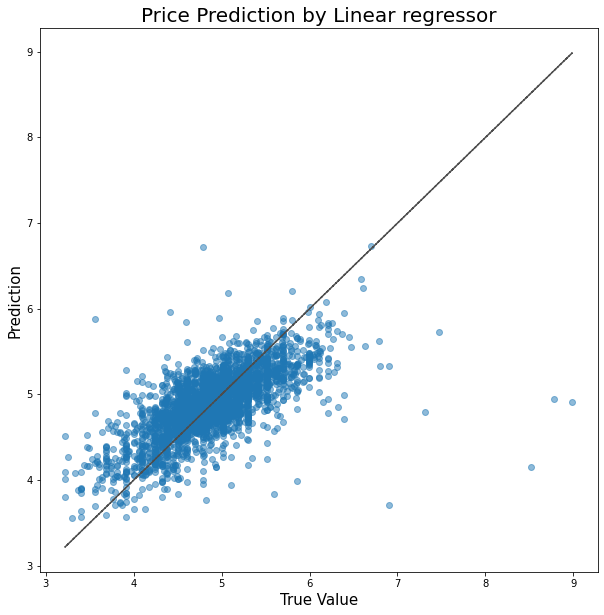

In [97]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred_test, alpha = 0.5)
plt.xlabel("True Value",fontsize = 15)
plt.ylabel("Prediction",fontsize = 15)
plt.title('Price Prediction by Linear regressor',fontsize = 20)
# diagnal
plt.plot(y_test, y_test, ls="--", c=".3")
plt.show()



In [98]:
print("Training RMSE:", np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print("Validation RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

print("\nTraining MSE:", metrics.mean_squared_error(y_train, y_pred_train))
print("Validation MSE:", metrics.mean_squared_error(y_test, y_pred_test))

print("\nTraining r2:", metrics.r2_score(y_train,  y_pred_train))
print("Validation r2:", metrics.r2_score(y_test, y_pred_test))


Training RMSE: 0.3820519201018117
Validation RMSE: 0.38023755304720047

Training MSE: 0.14596366965348112
Validation MSE: 0.1445805967473226

Training r2: 0.48118312569903143
Validation r2: 0.4759696833694479


#### Random Forest Regressor

In [99]:
reg_rf = RandomForestRegressor()
# train
reg_rf.fit(X_train, y_train)
# predict
y_pred_test = reg_rf.predict(X_test)
y_pred_train = reg_rf.predict(X_train)

##### Result (plot and statistics)
Relationship between predictions and actual values graphically with a scatter plot

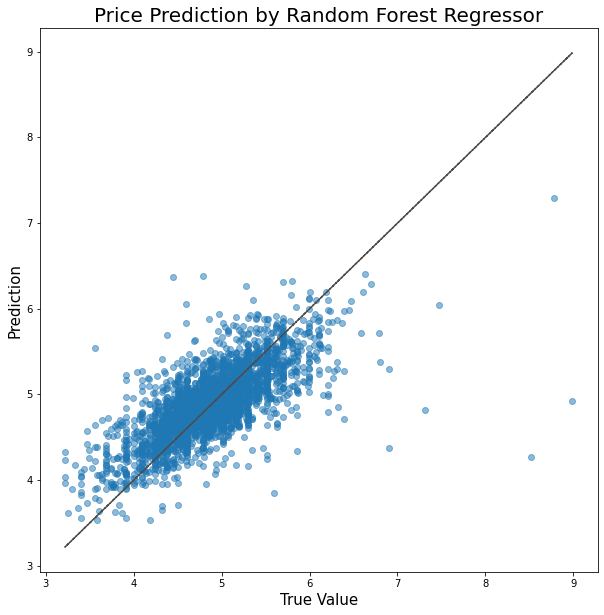

In [100]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred_test, alpha = 0.5)
plt.xlabel("True Value",fontsize=15)
plt.ylabel("Prediction",fontsize=15)
plt.title('Price Prediction by Random Forest Regressor',fontsize=20)
# diagnal
plt.plot(y_test, y_test, ls="--", c=".3")
plt.show()



In [101]:
print("Training RMSE:", np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print("Validation RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

print("\nTraining MSE:", metrics.mean_squared_error(y_train, y_pred_train))
print("Validation MSE:", metrics.mean_squared_error(y_test, y_pred_test))

print("\nTraining r2:", metrics.r2_score(y_train,  y_pred_train))
print("Validation r2:", metrics.r2_score(y_test, y_pred_test))


Training RMSE: 0.1397276559787204
Validation RMSE: 0.36818131866811854

Training MSE: 0.019523817845307635
Validation MSE: 0.13555748341619467

Training r2: 0.9306040594007332
Validation r2: 0.5086738293079788


##### Hyperparameter Tuning

Use RandomizedSearchCV to find optimized hyperparameter, including n_estimators,max_features,max_depth and min_samples_leaf.

In [103]:
param_grid = {
    # Number of trees in random forest
    'n_estimators' : [100,200,500], 
    # Number of features to consider at every split
    'max_features' : ['auto', 'sqrt'],
    # Maximum number of levels in tree
    'max_depth' : [x for x in range(1,50,5)],
    # Minimum number of samples required at each leaf node
    'min_samples_leaf' : [2, 4, 10, 16],
} 


In [104]:
tuned_rf = RandomizedSearchCV(reg_rf, param_grid, scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2)
# Train the tuned model
tuned_rf.fit(X_train,y_train)
# Predict
y_pred_test = tuned_rf.predict(X_test)
y_pred_train = tuned_rf.predict(X_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=11, max_features=auto, min_samples_leaf=2, n_estimators=200; total time=   8.4s
[CV] END max_depth=11, max_features=auto, min_samples_leaf=2, n_estimators=200; total time=   8.5s
[CV] END max_depth=11, max_features=auto, min_samples_leaf=2, n_estimators=200; total time=   8.0s
[CV] END max_depth=11, max_features=auto, min_samples_leaf=2, n_estimators=200; total time=   8.6s
[CV] END max_depth=11, max_features=auto, min_samples_leaf=2, n_estimators=200; total time=   9.0s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=4, n_estimators=100; total time=   0.6s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=4, n_estimators=100; total time=   0.6s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=4, n_estimators=100; total time=   0.7s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=4, n_estimators=100; total time=   0.7s
[CV] END max_depth=1, max_features=auto, min_samples

###### Result (plot and statistics)

Show relationship between predictions and actual values graphically with a scatter plot

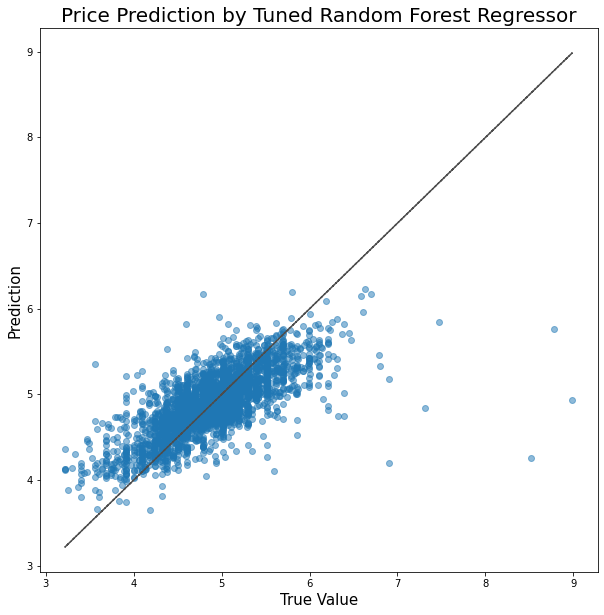

In [105]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred_test, alpha = 0.5)
plt.xlabel("True Value",fontsize=15)
plt.ylabel("Prediction",fontsize=15)
plt.title('Price Prediction by Tuned Random Forest Regressor',fontsize=20)

# diagnal
plt.plot(y_test, y_test, ls="--", c=".3")

plt.show()

In [106]:
print("Training RMSE:", np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print("Validation RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

print("\nTraining MSE:", metrics.mean_squared_error(y_train, y_pred_train))
print("Validation MSE:", metrics.mean_squared_error(y_test, y_pred_test))

print("\nTraining r2:", metrics.r2_score(y_train,  y_pred_train))
print("Validation r2:", metrics.r2_score(y_test, y_pred_test))


Training RMSE: 0.25055214030593054
Validation RMSE: 0.36294123796871947

Training MSE: 0.06277637501188271
Validation MSE: 0.13172634221826665

Training r2: 0.7768661014009135
Validation r2: 0.5225597460919248


#### Neural Network


In [83]:
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Sequential
from tensorflow import keras

In [84]:
input_dimension = X_train.shape[1]
# Initialising
model = Sequential()

# Adding input layer and first hidden layer
model.add(Dense(32, activation = 'relu', input_dim = 65))

# Second hidden layer
model.add(Dense(units = 64, activation = 'relu'))

# Third hidden layer
model.add(Dense(units = 64, activation = 'relu'))

# Output layer
model.add(Dense(units = 1))

# optimizer
opt = keras.optimizers.Adam(learning_rate=0.001)

# Compiling
model.compile(optimizer = opt, loss = 'mean_squared_error', metrics=["mean_squared_error"])


In [85]:
# Fitting to the Training set
history = model.fit(X_train, y_train, batch_size = 32, epochs = 1000)

Epoch 1/1000
403/403 [==============================] - 1s 1ms/step - loss: 36.0696 - mean_squared_error: 36.0696
Epoch 2/1000
403/403 [==============================] - 0s 1ms/step - loss: 0.2604 - mean_squared_error: 0.2604
Epoch 3/1000
403/403 [==============================] - 0s 1ms/step - loss: 0.2631 - mean_squared_error: 0.2631
Epoch 4/1000
403/403 [==============================] - 0s 1ms/step - loss: 0.2763 - mean_squared_error: 0.2763
Epoch 5/1000
403/403 [==============================] - 0s 1ms/step - loss: 0.2217 - mean_squared_error: 0.2217
Epoch 6/1000
403/403 [==============================] - 0s 1ms/step - loss: 0.2486 - mean_squared_error: 0.2486
Epoch 7/1000
403/403 [==============================] - 0s 1ms/step - loss: 0.2565 - mean_squared_error: 0.2565
Epoch 8/1000
403/403 [==============================] - 0s 1ms/step - loss: 0.2348 - mean_squared_error: 0.2348
Epoch 9/1000
403/403 [==============================] - 0s 1ms/step - loss: 0.2993 - mean_squared_erro

403/403 [==============================] - 0s 965us/step - loss: 0.1483 - mean_squared_error: 0.1483
Epoch 74/1000
403/403 [==============================] - 0s 948us/step - loss: 0.1469 - mean_squared_error: 0.1469
Epoch 75/1000
403/403 [==============================] - 0s 975us/step - loss: 0.1456 - mean_squared_error: 0.1456
Epoch 76/1000
403/403 [==============================] - 0s 950us/step - loss: 0.1455 - mean_squared_error: 0.1455
Epoch 77/1000
403/403 [==============================] - 0s 960us/step - loss: 0.1493 - mean_squared_error: 0.1493
Epoch 78/1000
403/403 [==============================] - 0s 1ms/step - loss: 0.1397 - mean_squared_error: 0.1397
Epoch 79/1000
403/403 [==============================] - 0s 967us/step - loss: 0.1417 - mean_squared_error: 0.1417
Epoch 80/1000
403/403 [==============================] - 0s 968us/step - loss: 0.1437 - mean_squared_error: 0.1437
Epoch 81/1000
403/403 [==============================] - 0s 953us/step - loss: 0.1497 - mean_squ

403/403 [==============================] - 0s 1ms/step - loss: 0.1234 - mean_squared_error: 0.1234
Epoch 216/1000
403/403 [==============================] - 0s 1ms/step - loss: 0.1217 - mean_squared_error: 0.1217
Epoch 217/1000
403/403 [==============================] - 0s 999us/step - loss: 0.1271 - mean_squared_error: 0.1271
Epoch 218/1000
403/403 [==============================] - 0s 1ms/step - loss: 0.1187 - mean_squared_error: 0.1187
Epoch 219/1000
403/403 [==============================] - 0s 1ms/step - loss: 0.1285 - mean_squared_error: 0.1285
Epoch 220/1000
403/403 [==============================] - 0s 1ms/step - loss: 0.1185 - mean_squared_error: 0.1185
Epoch 221/1000
403/403 [==============================] - 0s 1ms/step - loss: 0.1221 - mean_squared_error: 0.1221
Epoch 222/1000
403/403 [==============================] - 0s 1ms/step - loss: 0.1186 - mean_squared_error: 0.1186
Epoch 223/1000
403/403 [==============================] - 0s 1ms/step - loss: 0.1197 - mean_squared_e

403/403 [==============================] - 0s 976us/step - loss: 0.1148 - mean_squared_error: 0.1148
Epoch 358/1000
403/403 [==============================] - 0s 949us/step - loss: 0.1125 - mean_squared_error: 0.1125
Epoch 359/1000
403/403 [==============================] - 0s 949us/step - loss: 0.1125 - mean_squared_error: 0.1125
Epoch 360/1000
403/403 [==============================] - 0s 964us/step - loss: 0.1117 - mean_squared_error: 0.1117
Epoch 361/1000
403/403 [==============================] - 0s 959us/step - loss: 0.1125 - mean_squared_error: 0.1125
Epoch 362/1000
403/403 [==============================] - 0s 953us/step - loss: 0.1103 - mean_squared_error: 0.1103
Epoch 363/1000
403/403 [==============================] - 0s 961us/step - loss: 0.1113 - mean_squared_error: 0.1113
Epoch 364/1000
403/403 [==============================] - 0s 942us/step - loss: 0.1115 - mean_squared_error: 0.1115
Epoch 365/1000
403/403 [==============================] - 0s 955us/step - loss: 0.1182 

Epoch 498/1000
403/403 [==============================] - 0s 896us/step - loss: 0.1059 - mean_squared_error: 0.1059
Epoch 499/1000
403/403 [==============================] - 0s 893us/step - loss: 0.1075 - mean_squared_error: 0.1075
Epoch 500/1000
403/403 [==============================] - 0s 897us/step - loss: 0.1098 - mean_squared_error: 0.1098
Epoch 501/1000
403/403 [==============================] - 0s 919us/step - loss: 0.1081 - mean_squared_error: 0.1081
Epoch 502/1000
403/403 [==============================] - 0s 911us/step - loss: 0.1076 - mean_squared_error: 0.1076
Epoch 503/1000
403/403 [==============================] - 0s 895us/step - loss: 0.1101 - mean_squared_error: 0.1101
Epoch 504/1000
403/403 [==============================] - 0s 901us/step - loss: 0.1071 - mean_squared_error: 0.1071
Epoch 505/1000
403/403 [==============================] - 0s 919us/step - loss: 0.1095 - mean_squared_error: 0.1095
Epoch 506/1000
403/403 [==============================] - 0s 920us/step 

403/403 [==============================] - 0s 911us/step - loss: 0.1079 - mean_squared_error: 0.1079
Epoch 570/1000
403/403 [==============================] - 0s 969us/step - loss: 0.0997 - mean_squared_error: 0.0997
Epoch 571/1000
403/403 [==============================] - 0s 910us/step - loss: 0.1067 - mean_squared_error: 0.1067
Epoch 572/1000
403/403 [==============================] - 0s 909us/step - loss: 0.1067 - mean_squared_error: 0.1067
Epoch 573/1000
403/403 [==============================] - 0s 896us/step - loss: 0.1029 - mean_squared_error: 0.1029
Epoch 574/1000
403/403 [==============================] - 0s 1ms/step - loss: 0.1013 - mean_squared_error: 0.1013
Epoch 575/1000
403/403 [==============================] - 0s 912us/step - loss: 0.1003 - mean_squared_error: 0.1003
Epoch 576/1000
403/403 [==============================] - 0s 1ms/step - loss: 0.1024 - mean_squared_error: 0.1024
Epoch 577/1000
403/403 [==============================] - 0s 984us/step - loss: 0.1096 - me

403/403 [==============================] - 0s 913us/step - loss: 0.0965 - mean_squared_error: 0.0965
Epoch 712/1000
403/403 [==============================] - 0s 889us/step - loss: 0.1000 - mean_squared_error: 0.1000
Epoch 713/1000
403/403 [==============================] - 0s 895us/step - loss: 0.0976 - mean_squared_error: 0.0976
Epoch 714/1000
403/403 [==============================] - 0s 899us/step - loss: 0.1005 - mean_squared_error: 0.1005
Epoch 715/1000
403/403 [==============================] - 0s 900us/step - loss: 0.1026 - mean_squared_error: 0.1026
Epoch 716/1000
403/403 [==============================] - 0s 900us/step - loss: 0.1029 - mean_squared_error: 0.1029
Epoch 717/1000
403/403 [==============================] - 0s 891us/step - loss: 0.1032 - mean_squared_error: 0.1032
Epoch 718/1000
403/403 [==============================] - 0s 896us/step - loss: 0.0972 - mean_squared_error: 0.0972
Epoch 719/1000
403/403 [==============================] - 0s 902us/step - loss: 0.0998 

403/403 [==============================] - 0s 898us/step - loss: 0.0906 - mean_squared_error: 0.0906
Epoch 852/1000
403/403 [==============================] - 0s 900us/step - loss: 0.0931 - mean_squared_error: 0.0931
Epoch 853/1000
403/403 [==============================] - 0s 895us/step - loss: 0.0951 - mean_squared_error: 0.0951
Epoch 854/1000
403/403 [==============================] - 0s 898us/step - loss: 0.0962 - mean_squared_error: 0.0962
Epoch 855/1000
403/403 [==============================] - 0s 897us/step - loss: 0.0956 - mean_squared_error: 0.0956
Epoch 856/1000
403/403 [==============================] - 0s 919us/step - loss: 0.0939 - mean_squared_error: 0.0939
Epoch 857/1000
403/403 [==============================] - 0s 901us/step - loss: 0.0983 - mean_squared_error: 0.0983
Epoch 858/1000
403/403 [==============================] - 0s 905us/step - loss: 0.0924 - mean_squared_error: 0.0924
Epoch 859/1000
403/403 [==============================] - 0s 1ms/step - loss: 0.0984 - 

403/403 [==============================] - 0s 913us/step - loss: 0.0983 - mean_squared_error: 0.0983
Epoch 992/1000
403/403 [==============================] - 0s 902us/step - loss: 0.0946 - mean_squared_error: 0.0946
Epoch 993/1000
403/403 [==============================] - 0s 888us/step - loss: 0.0918 - mean_squared_error: 0.0918
Epoch 994/1000
403/403 [==============================] - 0s 962us/step - loss: 0.0952 - mean_squared_error: 0.0952
Epoch 995/1000
403/403 [==============================] - 0s 934us/step - loss: 0.0933 - mean_squared_error: 0.0933
Epoch 996/1000
403/403 [==============================] - 0s 927us/step - loss: 0.0947 - mean_squared_error: 0.0947
Epoch 997/1000
403/403 [==============================] - 0s 930us/step - loss: 0.0906 - mean_squared_error: 0.0906
Epoch 998/1000
403/403 [==============================] - 0s 1ms/step - loss: 0.0963 - mean_squared_error: 0.0963
Epoch 999/1000
403/403 [==============================] - 0s 1ms/step - loss: 0.0968 - me

In [86]:
#predict
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

##### Result (plot and statistics)
Relationship between predictions and actual values graphically with a scatter plot

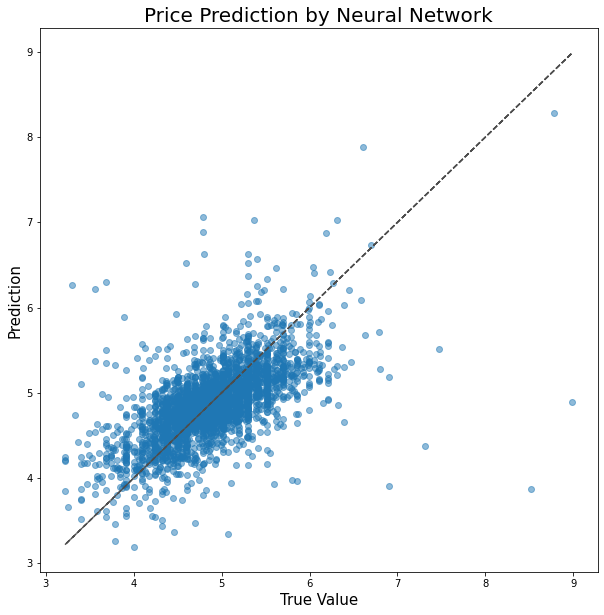

In [87]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred_test, alpha = 0.5)
plt.xlabel("True Value",fontsize=15)
plt.ylabel("Prediction",fontsize=15)
plt.title('Price Prediction by Neural Network',fontsize=20)
# diagnal
plt.plot(y_test, y_test, ls="--", c=".3")
plt.show()

In [88]:
print("Training RMSE:", np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print("Validation RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

print("\nTraining MSE:", metrics.mean_squared_error(y_train, y_pred_train))
print("Validation MSE:", metrics.mean_squared_error(y_test, y_pred_test))

print("\nTraining r2:", metrics.r2_score(y_train,  y_pred_train))
print("Validation r2:", metrics.r2_score(y_test, y_pred_test))


Training RMSE: 0.30317024371033713
Validation RMSE: 0.4290002766509487

Training MSE: 0.0919121966713852
Validation MSE: 0.18404123736659053

Training r2: 0.6733050169238007
Validation r2: 0.3329451526691184

Training adj r2: 0.9299990147963652
Validation adj r2: 0.49876434215765886


##### Loss changes
Plot the loss changes during training, to find whether the model converged.



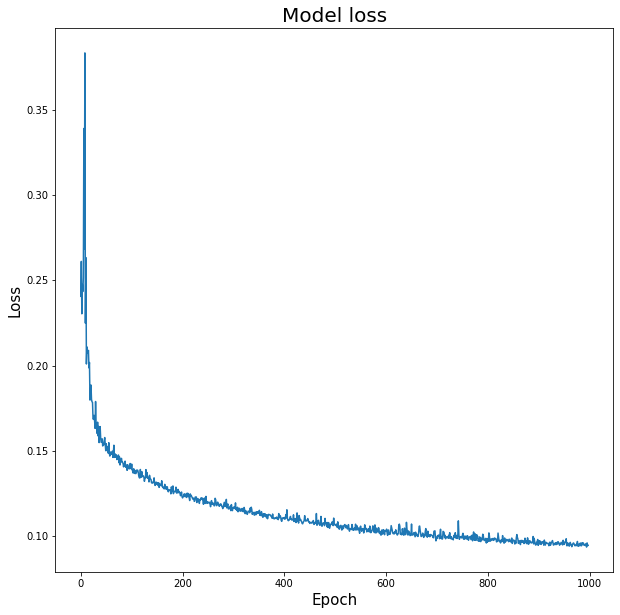

In [89]:
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'][2:])

plt.title('Model loss',fontsize = 20)
plt.ylabel('Loss',fontsize = 15)
plt.xlabel('Epoch',fontsize = 15)
plt.show()

# Q5 What are the various factors which affect the Airbnb listing?

##### Feature importance
One advantage of using decision tree methods is that they can automatically provide an estimate of feature importance from the trained prediction model.

The importance indicates the value of each feature when building an enhanced decision tree in the model. The more times the attribute makes key decisions in the decision tree, the higher its relative importance.

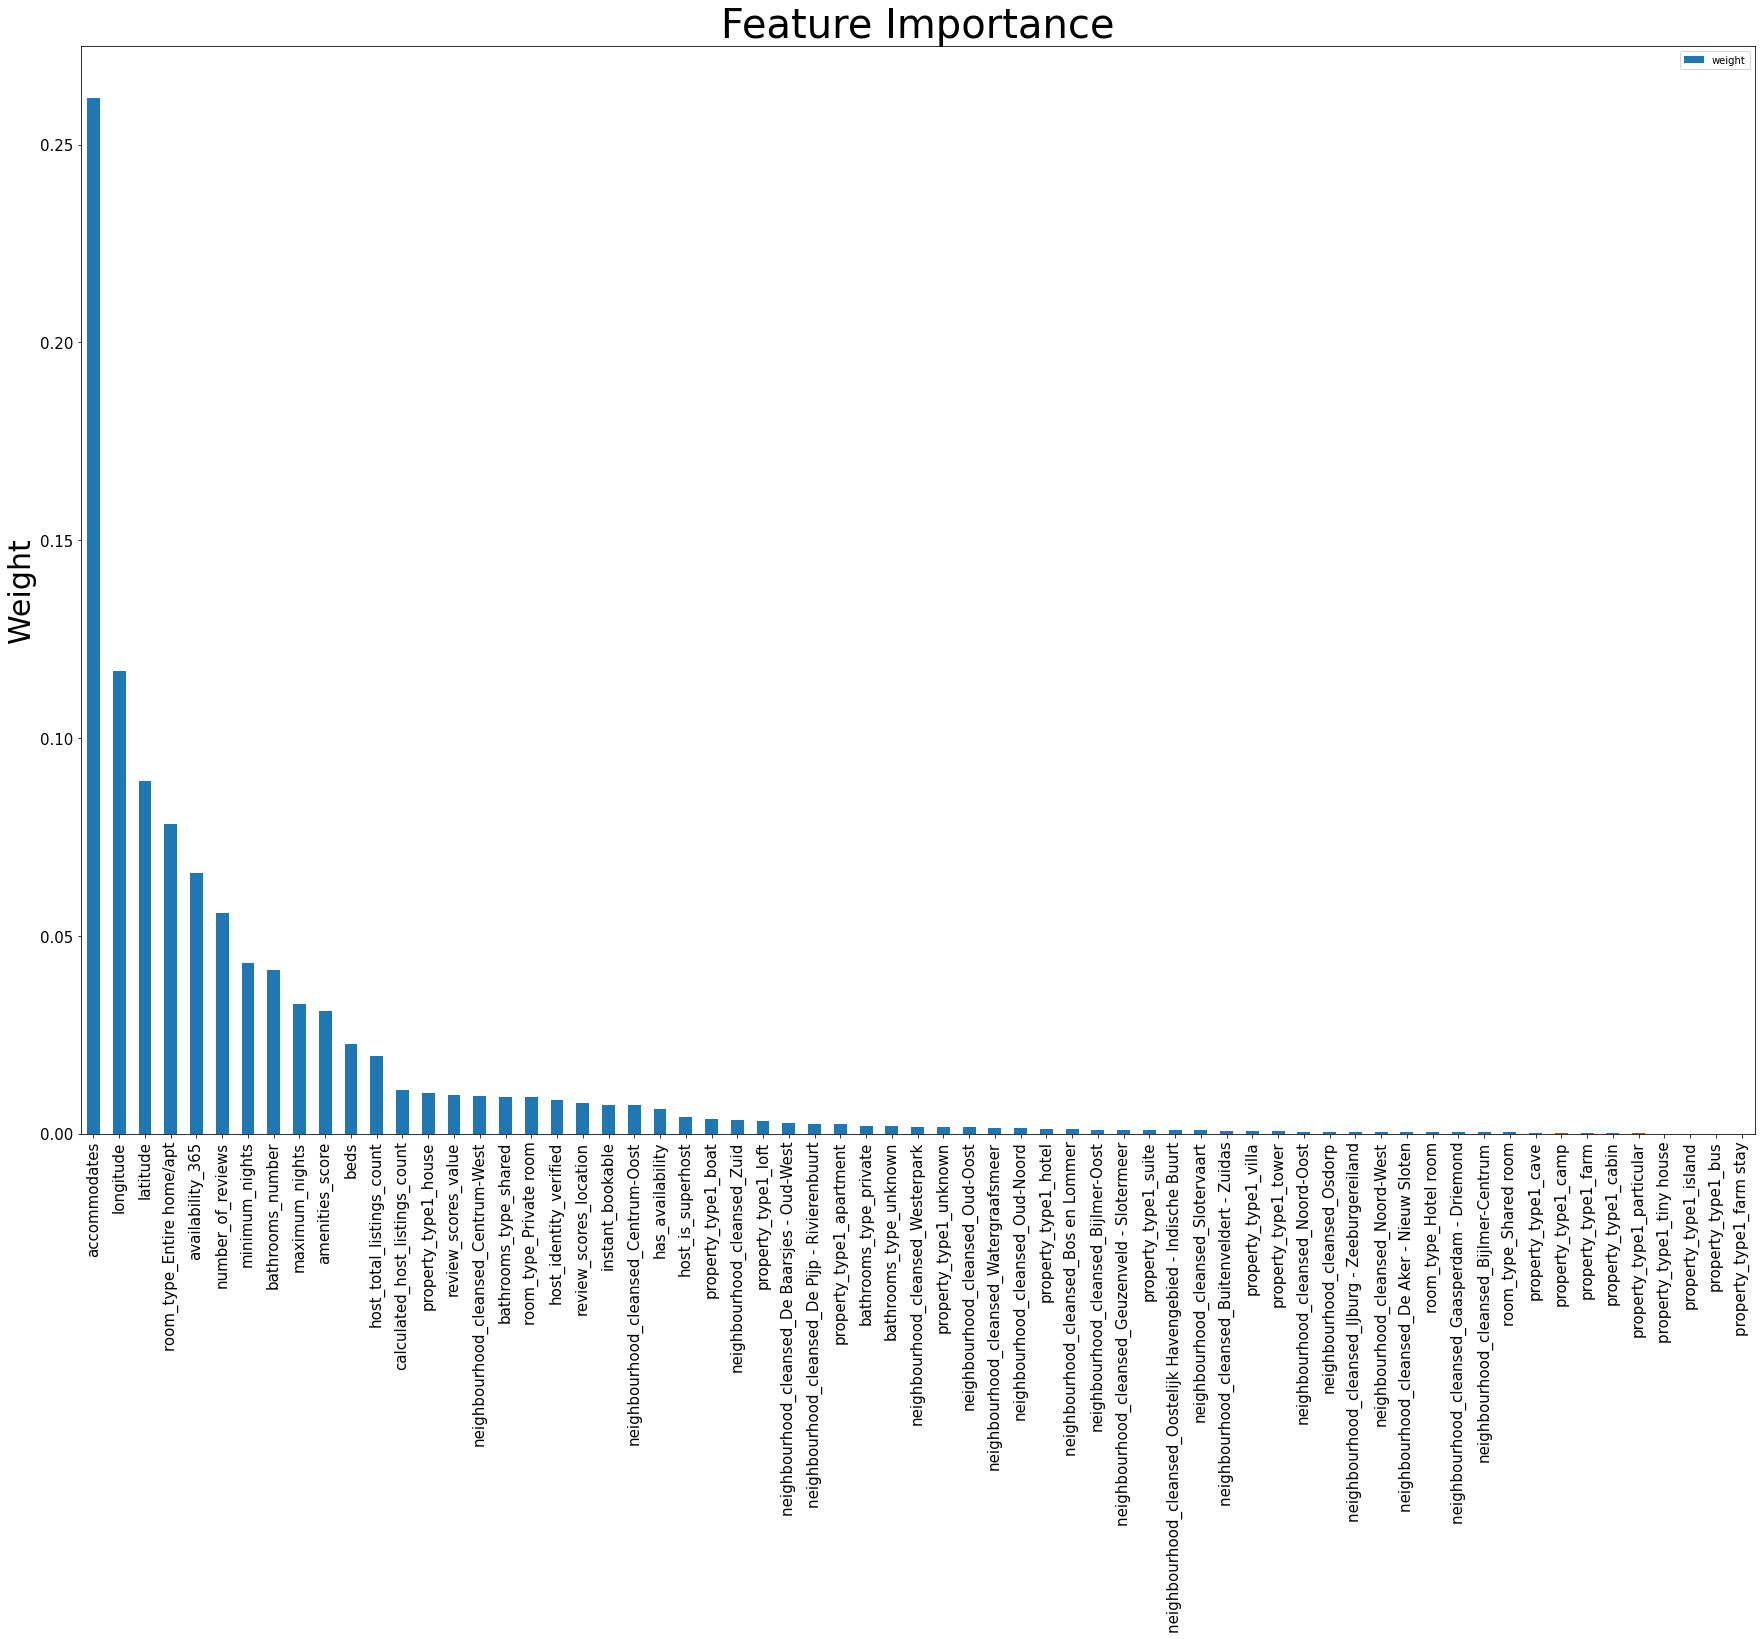

In [102]:
x = pd.DataFrame(reg_rf.feature_importances_, columns=['weight'], index=X_train.columns)
# sort by value
x.sort_values('weight', ascending=False, inplace=True)
x.plot.bar(figsize=(30,20),fontsize=15)
plt.title('Feature Importance',fontsize=40)
plt.ylabel('Weight', fontsize=30)
plt.show()

# Conclusion